In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler ,normalize
from sklearn.decomposition import PCA

C:\Users\kaout\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# About the dataset:
* CUSTID: Identification of Credit Card holder 
* BALANCE: Balance amount left in customer's account to make purchases
* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Amount of purchases made from account
* ONEOFFPURCHASES: Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* CASH_ADVANCE: Cash in advance given by the user
* PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
* CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
* PURCHASES_TRX: Number of purchase transactions made
* CREDIT_LIMIT: Limit of Credit Card for user
* PAYMENTS: Amount of Payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payments made by user  
* PRC_FULL_PAYMENT: Percent of full payment paid by user
* TENURE: Tenure of credit card service for user

In [2]:
df=pd.read_csv('Marketing_data.csv')
df
#we have 8950 customers,18 features 


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Dealing with missing values:

In [4]:
df.isnull().any().any()

True

In [5]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

In [6]:
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].replace(np.nan,df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].replace(np.nan,df['MINIMUM_PAYMENTS'].mean())
df.drop("CUST_ID",axis=1,inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [7]:
#check for duplicated credit card before dropping CUST_ID column
df.duplicated().sum()

0

# Dealing with outliers

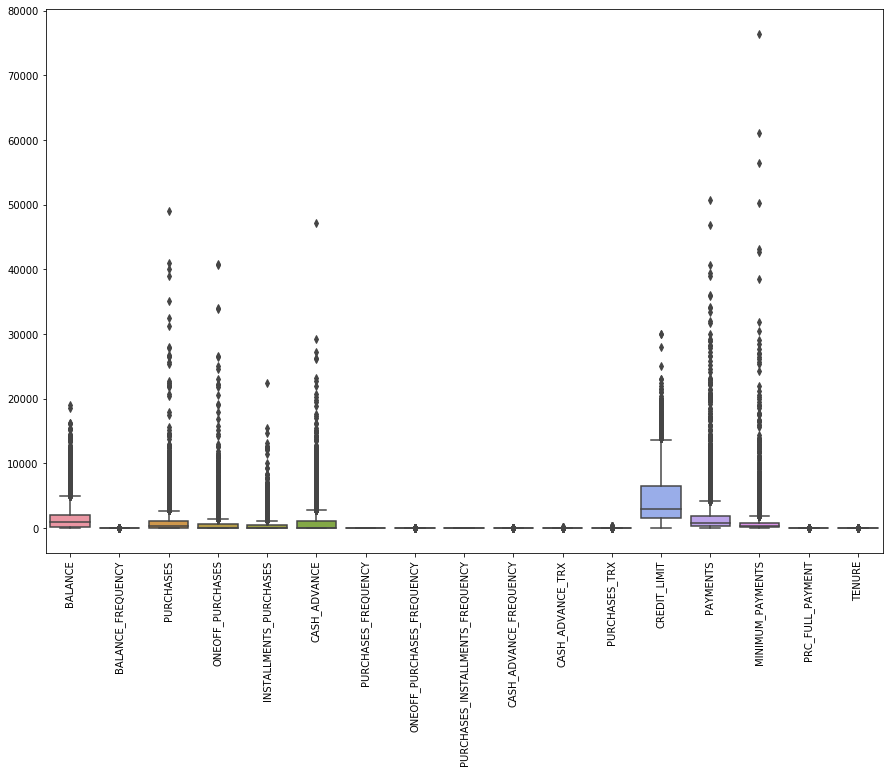

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [9]:
from scipy import stats

z_score=np.abs(stats.zscore(df))
z_score

array([[0.73198937, 0.24943448, 0.42489974, ..., 0.31096755, 0.52555097,
        0.36067954],
       [0.78696085, 0.13432467, 0.46955188, ..., 0.08931021, 0.2342269 ,
        0.36067954],
       [0.44713513, 0.51808382, 0.10766823, ..., 0.10166318, 0.52555097,
        0.36067954],
       ...,
       [0.7403981 , 0.18547673, 0.40196519, ..., 0.33546549, 0.32919999,
        4.12276757],
       [0.74517423, 0.18547673, 0.46955188, ..., 0.34690648, 0.32919999,
        4.12276757],
       [0.57257511, 0.88903307, 0.04214581, ..., 0.33294642, 0.52555097,
        4.12276757]])

In [10]:
df = pd.DataFrame(df[(z_score < 3).all(axis=1)], columns = df.columns)
df.shape

(7434, 17)

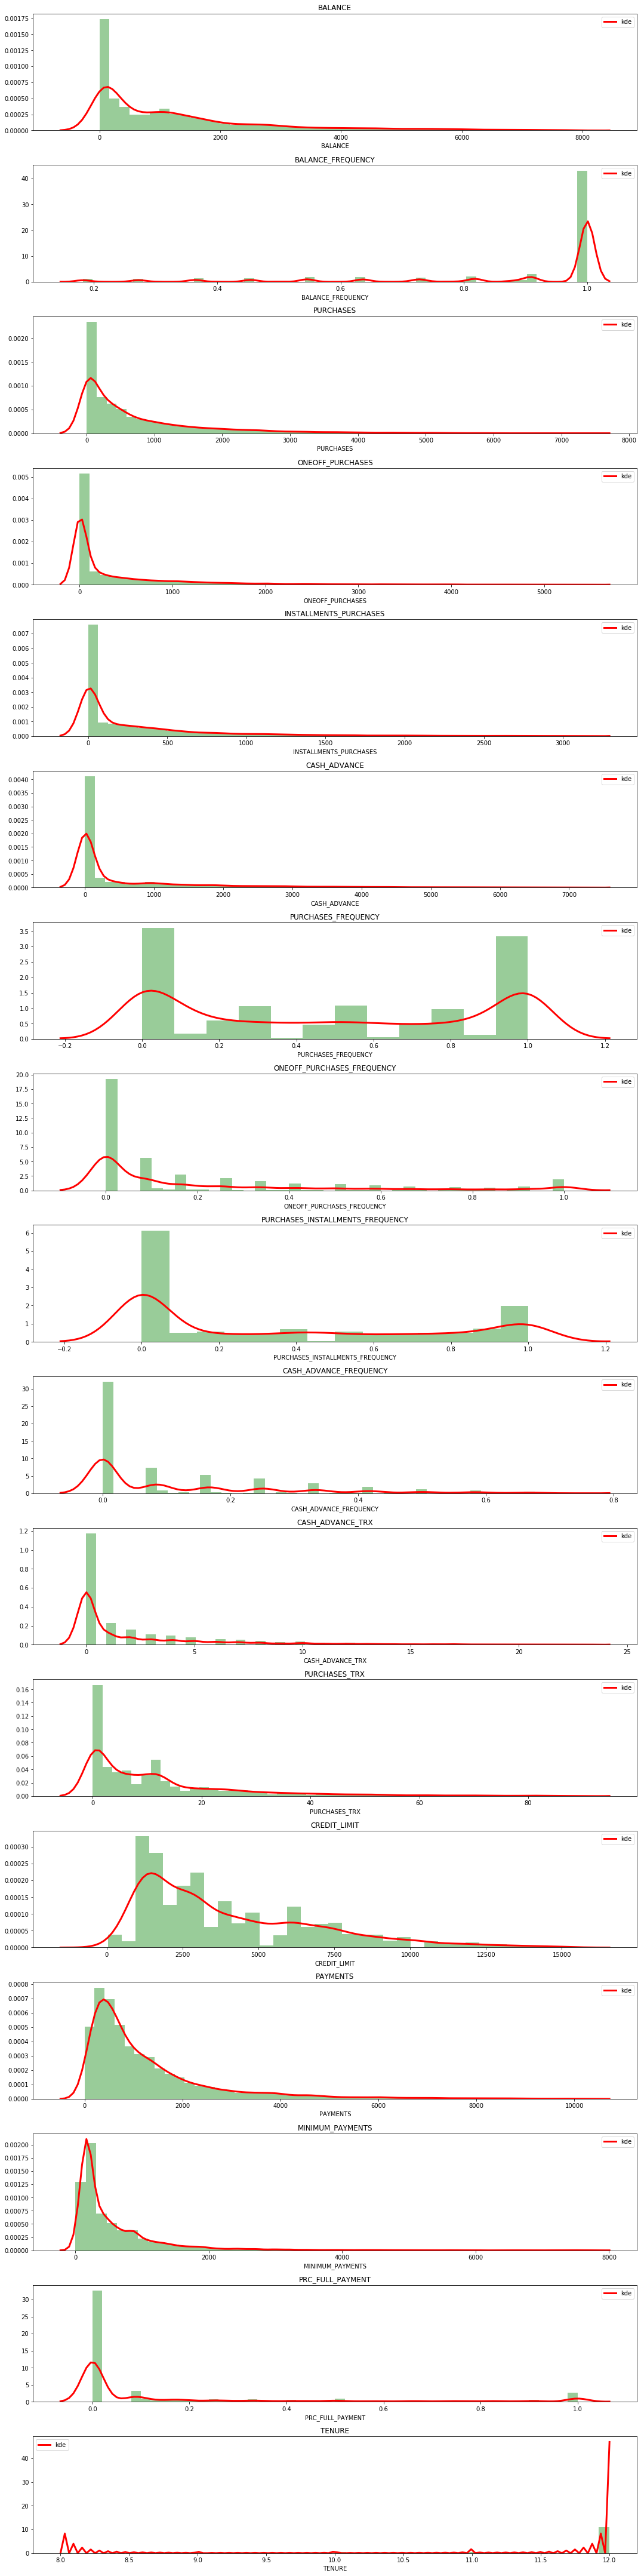

In [11]:
#Distplot combines the matplotlib.hist function with seaborn kdeplot()
plt.figure(figsize=(15,60))
for i in range(len(df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'r','lw':3,'label':'kde'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
    plt.tight_layout(pad=1.0,w_pad=1.0,h_pad=1.0)

*The histogram is in blue color, and kde in red color
- The mean balance is ~1500,most customers are around that mean
- The balance frequency for most customers is around 1 which means they use their credit card frequently
- The purchases are around the mean ~1000
- Concerning purchases_frequently we have 2 clusters of customers:one of them use credit card frequently ,the other don't
- Not a lot of customers do the oneoff_purchases_frequency same for cach_advance_frequency
- Most customers don't do the full payment


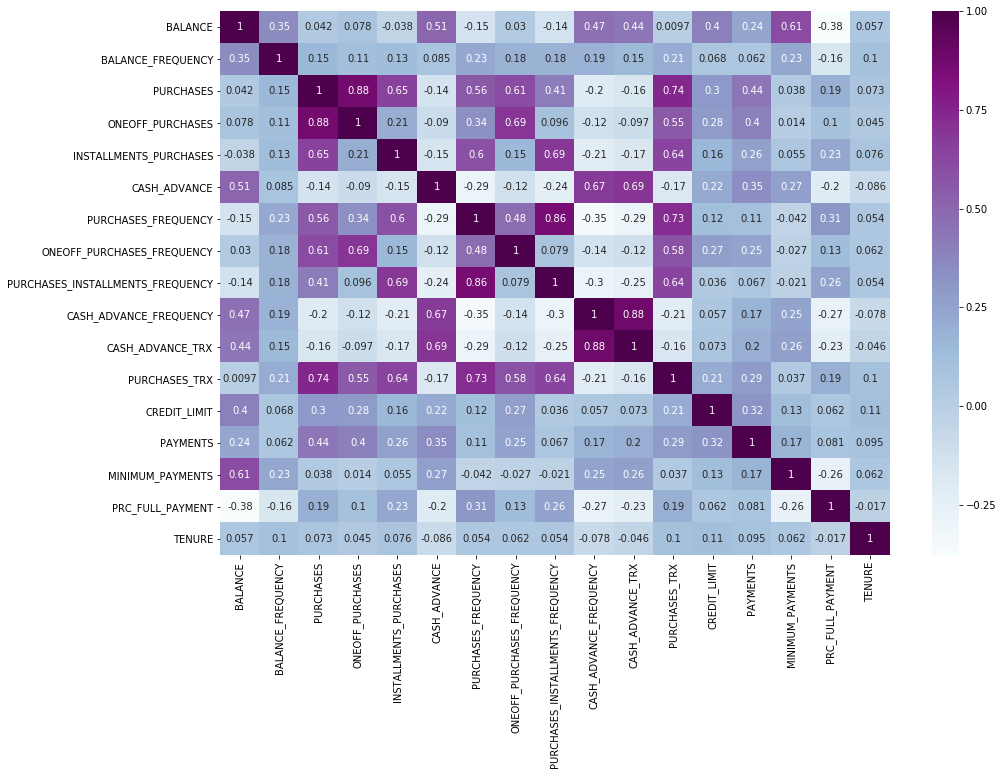

In [12]:
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True,cmap="BuPu")
plt.show()
f.savefig('corr.png')


we notice that:
- 'PURCHASES' have strong correlation with one-off purchases, 'installment purchases, purchase trx, credit limit and payments. 
- 'PURCHASES_FREQUENCY' is highly correlated with  'PURCHASES_INSTALLMENT_FREQUENCY'

# K-means:
First well apply elbow method to find the optimal number of clusters

In [13]:
scaler=StandardScaler()
df_scale=scaler.fit_transform(df)
df_scaled=pd.DataFrame(data= df_scale,columns=[df.columns])
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,-0.756687,-0.654440,-0.358761,-0.057990,-0.636612,-0.406721,0.035966,1.069739,-0.910579,0.096509,0.173950,-0.334531,-1.192081,-0.834962,-0.610734,-0.531523,-4.697636
7430,-0.800266,-0.068638,-0.575218,-0.543505,-0.313852,-0.543984,0.982164,-0.668791,0.999753,-0.690806,-0.587319,-0.334531,-1.021765,-0.859750,-0.616355,-0.531523,-4.697636
7431,-0.263862,-0.654440,-0.734487,-0.543505,-0.636612,0.390178,-1.225631,-0.668791,-0.910579,0.096509,0.173950,-0.797517,-0.953638,-0.798391,-0.322151,-0.531523,-4.697636
7432,-0.745849,0.517164,-0.304400,-0.543505,0.234966,-0.543984,0.666765,-0.668791,0.681364,-0.690806,-0.587319,-0.400671,-1.021765,-0.785516,-0.596957,-0.531523,-4.697636


In [14]:
from sklearn.cluster import KMeans

score=[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i,random_state=0).fit(df_scaled.values)
    score.append(kmeans.inertia_)
score

[126378.0,
 101651.82418226279,
 86658.17454077832,
 77259.1189306878,
 71469.95327392007,
 67017.63133316004,
 62892.67877099827,
 59976.43197535857,
 57359.60696387824,
 54978.287413474936,
 52912.69792548063,
 51089.59109569121,
 50128.38574547882,
 48423.139427708214,
 47199.62087104612,
 46322.46343968805,
 45249.960097382376,
 44210.531218988515,
 43293.729151903826]

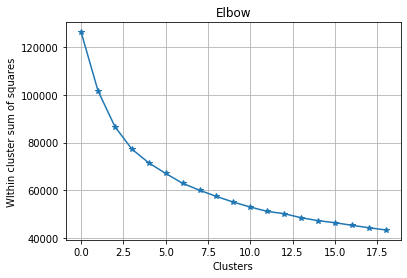

In [15]:
plt.plot(score,marker='*')
plt.grid()
plt.xlabel('Clusters')
plt.ylabel('WIthin cluster sum of squares')
plt.title('Elbow')
plt.show()


The value of score start descreasing linearly starting 8th cluster
from the plot we choose 8 as the optimal number of clusters in this case

In [16]:
kmeans= KMeans(n_clusters=7,random_state=0).fit(df_scaled)

In [17]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.113489,0.327196,0.582600,0.913976,-0.253120,-0.422692,0.721695,1.687809,-0.244432,-0.464683,-0.432049,0.482210,0.419581,0.073060,-0.173361,0.189104,0.208546
1,-0.436054,0.302338,0.048416,-0.390346,0.710845,-0.447979,1.016245,-0.426470,1.249180,-0.519915,-0.464186,0.395908,-0.263065,-0.252335,-0.131107,0.383410,0.224377
2,1.407280,0.363449,-0.408694,-0.284909,-0.381866,1.805166,-0.607601,-0.309179,-0.513654,1.695809,1.786637,-0.440972,0.616750,0.684318,0.852178,-0.433512,0.103022
3,0.029262,0.408496,-0.564480,-0.378447,-0.550557,-0.149461,-0.864941,-0.428089,-0.725371,0.065764,-0.058357,-0.639832,-0.364752,-0.350610,0.011737,-0.468692,0.231084
4,0.345511,0.398125,2.495193,2.137475,1.703896,-0.201929,1.141317,1.532996,1.064570,-0.272616,-0.221389,2.189119,0.900871,1.337710,0.179124,0.362476,0.237538
5,-0.768948,-2.176728,-0.436701,-0.318771,-0.385013,-0.340691,-0.564491,-0.424915,-0.443866,-0.511390,-0.428152,-0.521010,-0.148876,-0.275592,-0.527895,0.386588,0.185222
6,-0.318782,-0.352883,-0.325780,-0.235979,-0.289029,0.140562,-0.196718,-0.275108,-0.178322,0.217853,0.045110,-0.402717,-0.533128,-0.428359,-0.288778,0.014855,-3.690506


In [18]:
cluster_centers_reverse = scaler.inverse_transform(cluster_centers)
cluster_centers_reverse = pd.DataFrame(data = cluster_centers_reverse, columns = [df.columns])
cluster_centers_reverse

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1097.571806,0.959464,1350.505128,1156.523112,194.039126,149.826037,0.771770,0.677757,0.261531,0.035901,0.611888,19.348485,5231.362577,1402.509650,453.500978,0.209562,11.917249
1,607.966586,0.954160,802.767940,121.532798,681.784514,118.590310,0.888507,0.069691,0.847926,0.027132,0.485240,18.043665,3227.316213,935.111728,486.304931,0.266067,11.929889
2,3405.871585,0.967200,334.059180,205.198087,128.896235,2901.791095,0.244940,0.103424,0.155834,0.378916,9.355263,5.390688,5810.193535,2280.521130,1249.683447,0.028502,11.832996
3,1314.247808,0.976812,174.320554,130.975274,43.542452,487.335625,0.142950,0.069226,0.072713,0.120119,2.084528,2.384083,2928.793870,793.949210,597.203092,0.018272,11.935245
4,1794.266363,0.974599,3311.626142,2127.379040,1184.247103,422.524765,0.938076,0.633233,0.775447,0.066395,1.442053,45.155629,6644.288079,3219.054213,727.154251,0.259980,11.940397
5,102.684134,0.425170,305.342270,178.328353,127.304097,251.118816,0.262025,0.070138,0.183233,0.028485,0.627244,4.180570,3562.543119,901.704821,178.256741,0.266992,11.898627
6,785.969079,0.814347,419.077345,244.024768,175.869588,845.586486,0.407782,0.113223,0.287486,0.144265,2.492268,5.969072,2434.493127,682.270092,363.896457,0.158890,8.804124


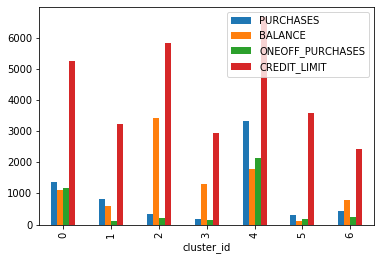

In [20]:
df['cluster_id'] = kmeans.labels_
df[['cluster_id','PURCHASES','BALANCE','ONEOFF_PURCHASES','CREDIT_LIMIT']].groupby('cluster_id').mean().plot(kind='bar')
plt.show()


* cluster4(big spenders):use credit card more,do lot of puchases 
* cluster 2: high credit limit,high balance after big spenders
* cluster 5:doesn't use their credit card much
* cluster 1&6: have low balance,careful with their money

In [21]:
df_cluster=pd.concat([df,pd.DataFrame({'Cluster number':kmeans.labels_})],axis=1)
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id,Cluster number
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,3.0,3.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2.0,2.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.0,0.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,3.0,3.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125000,3.0,7.0,500.0,98.225317,113.944625,0.000000,8.0,6.0,NaN
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0.0,7.0,1000.0,62.619008,109.580539,0.000000,8.0,6.0,NaN
8878,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125000,3.0,0.0,1200.0,150.755024,337.986933,0.000000,8.0,6.0,NaN
8879,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000000,0.0,6.0,1000.0,169.249683,124.639905,0.000000,8.0,6.0,NaN


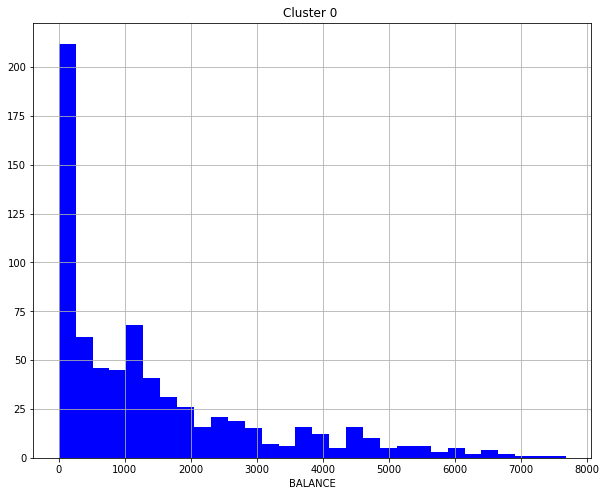

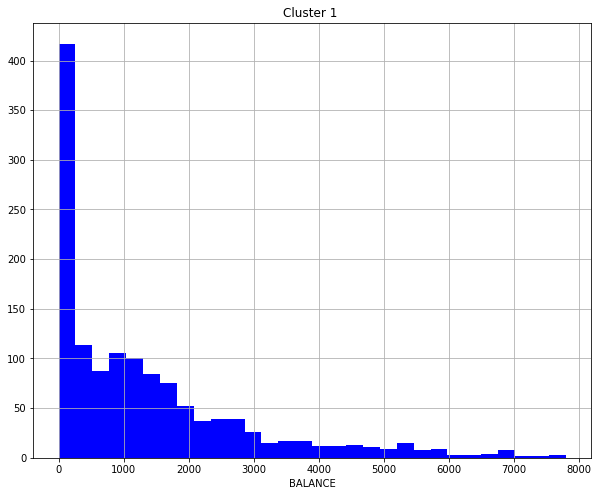

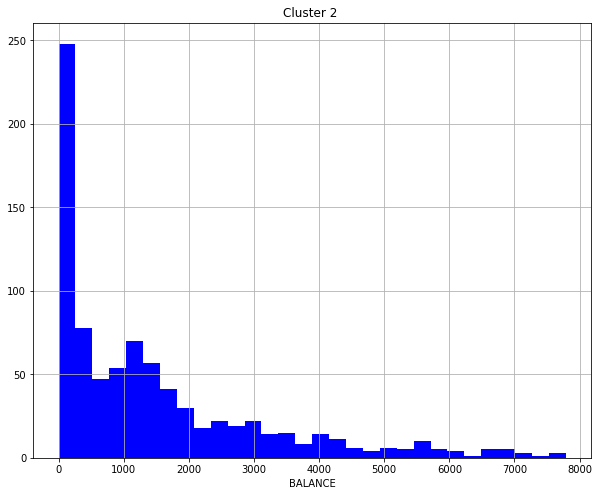

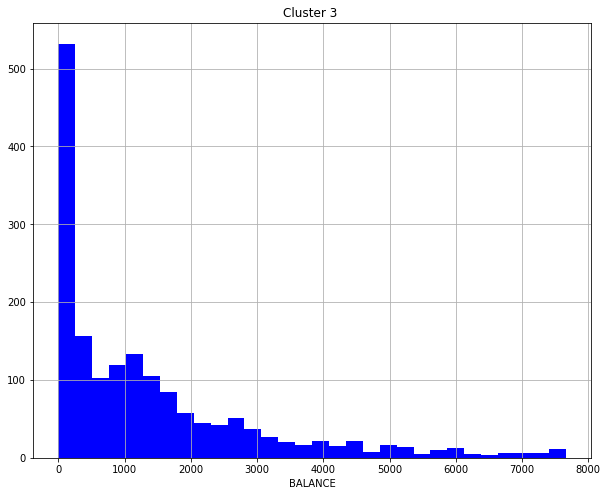

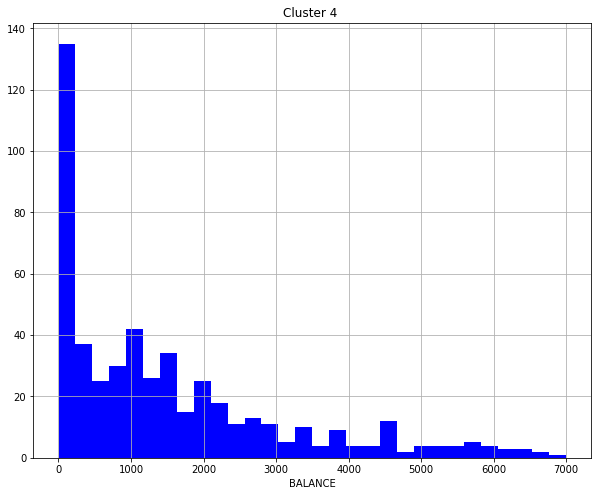

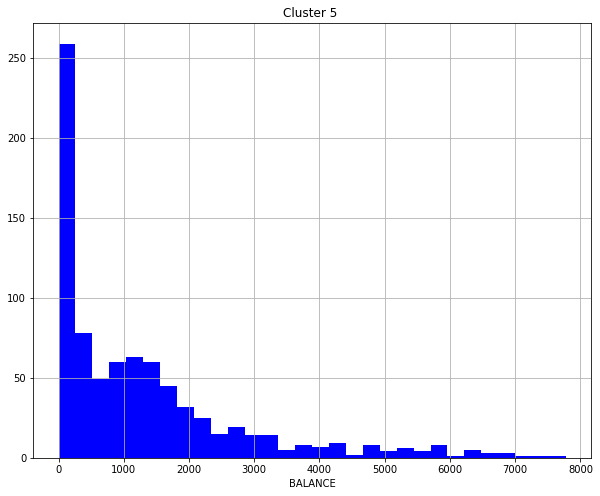

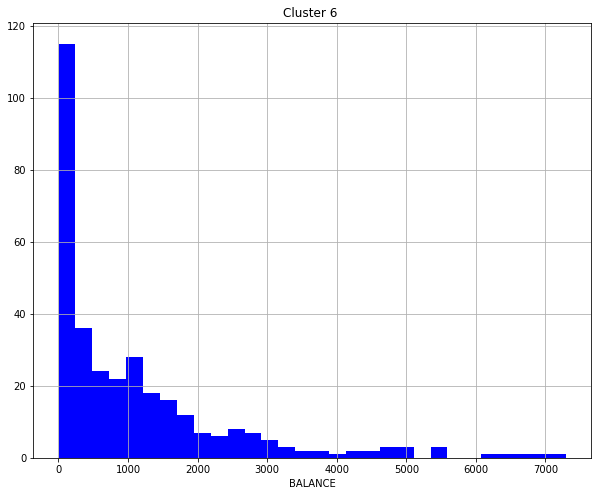

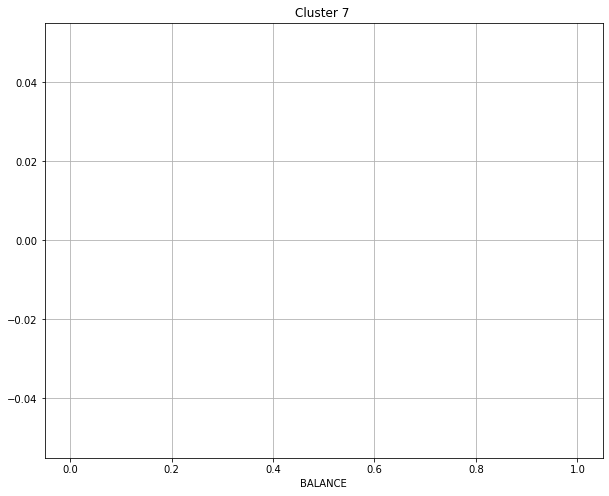

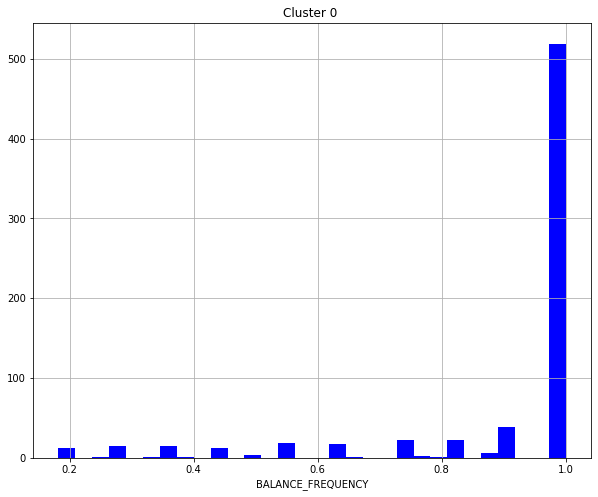

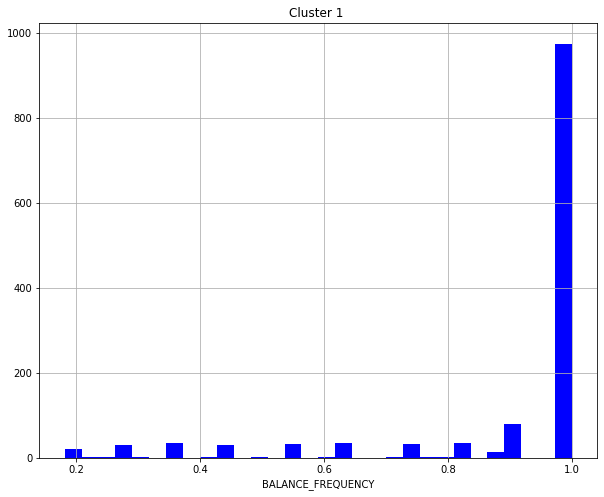

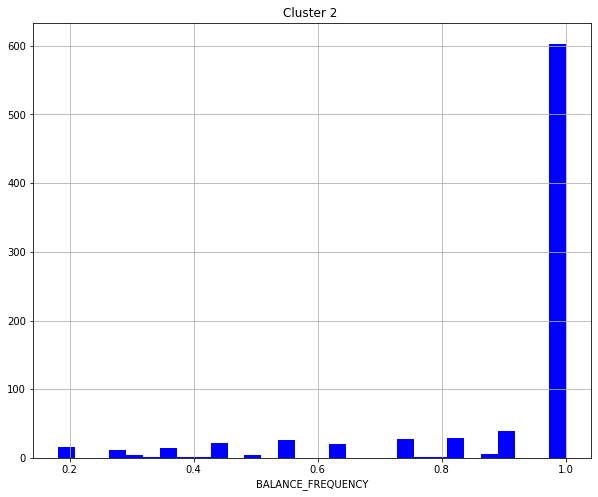

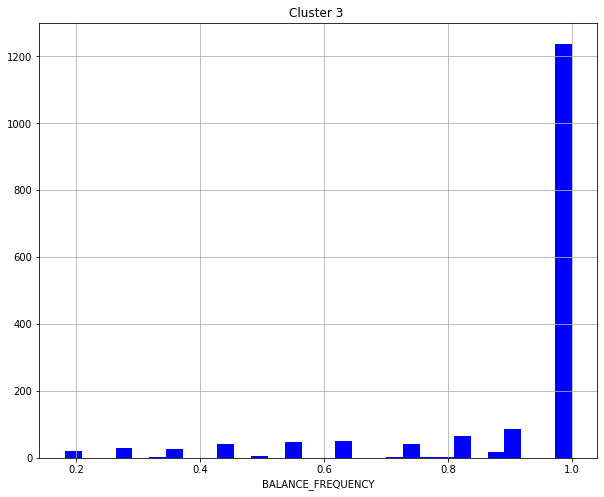

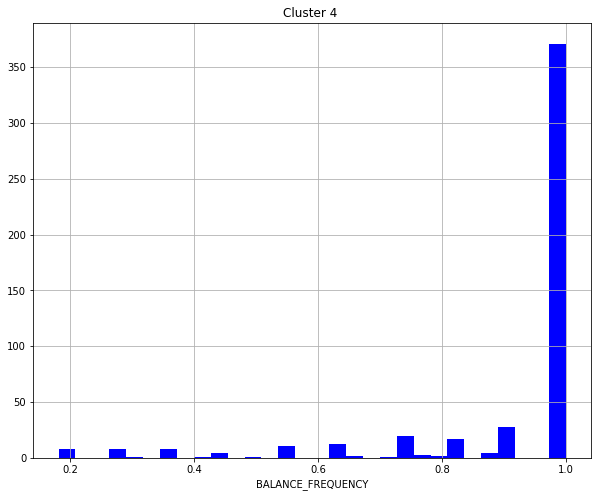

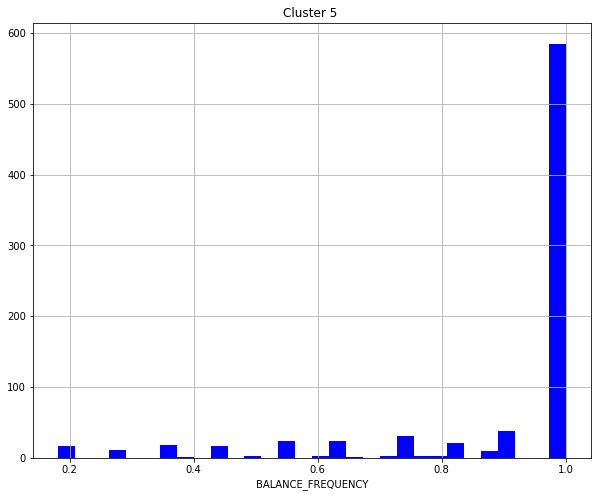

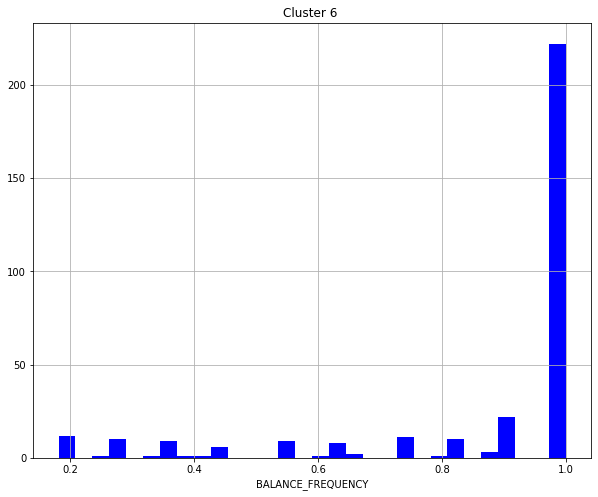

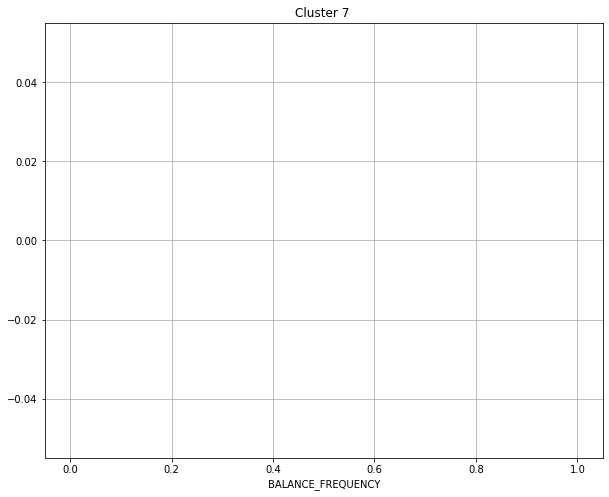

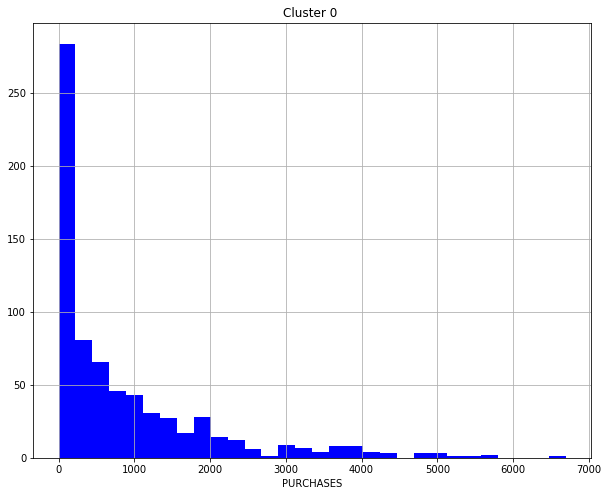

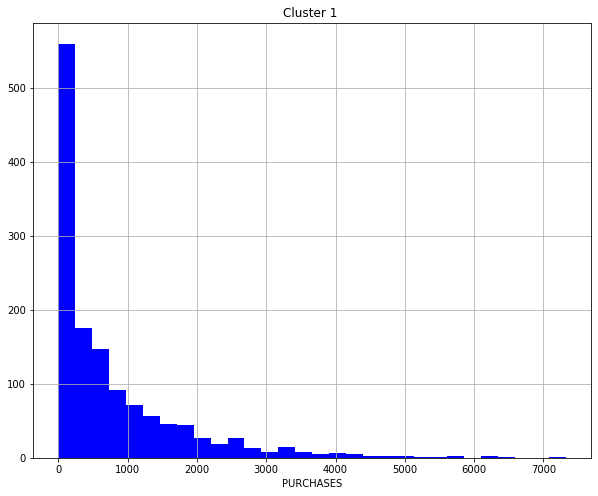

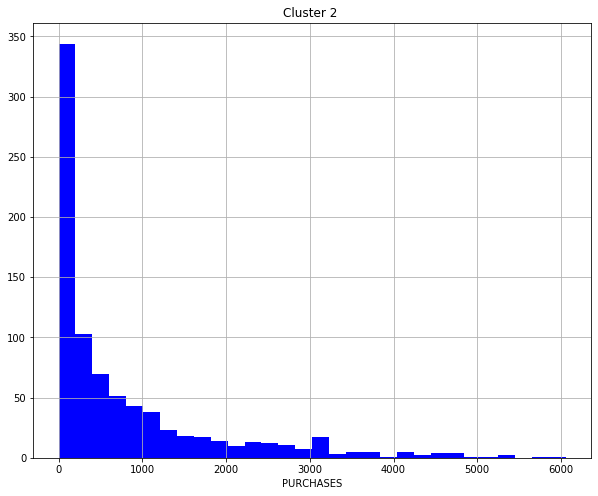

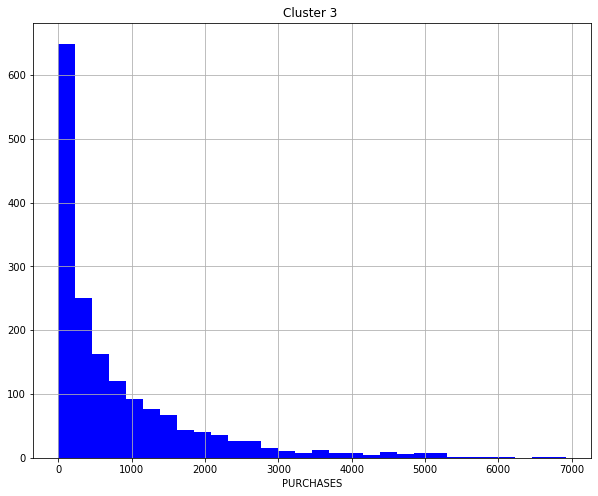

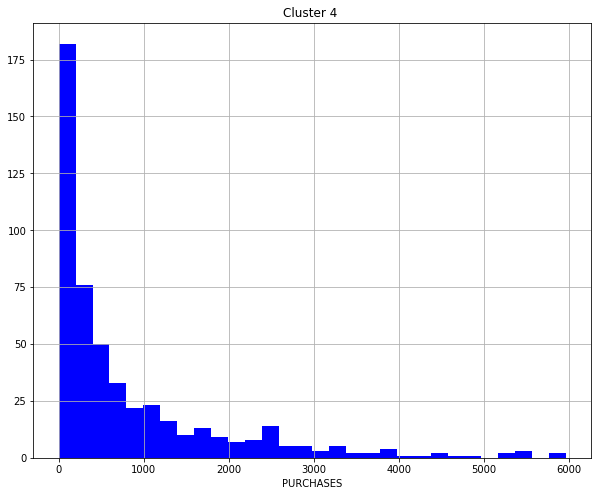

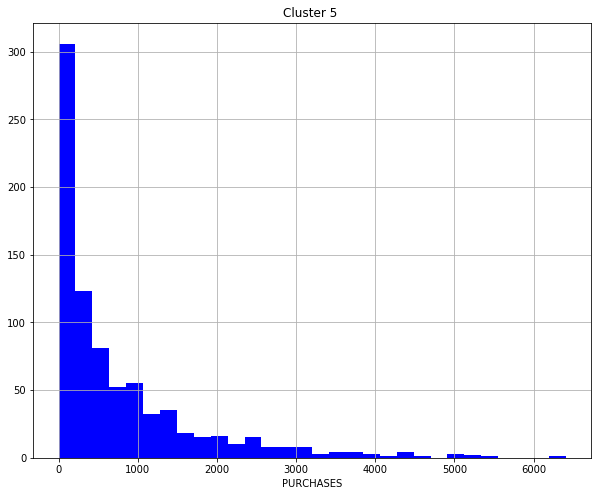

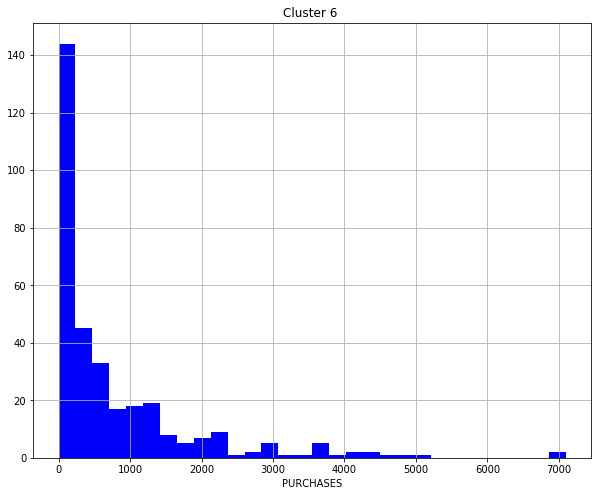

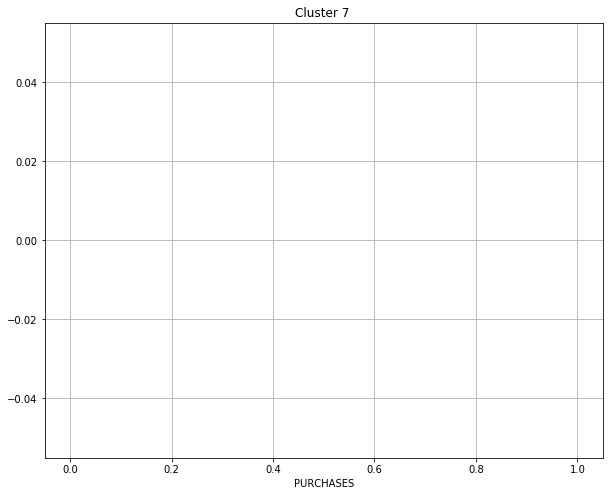

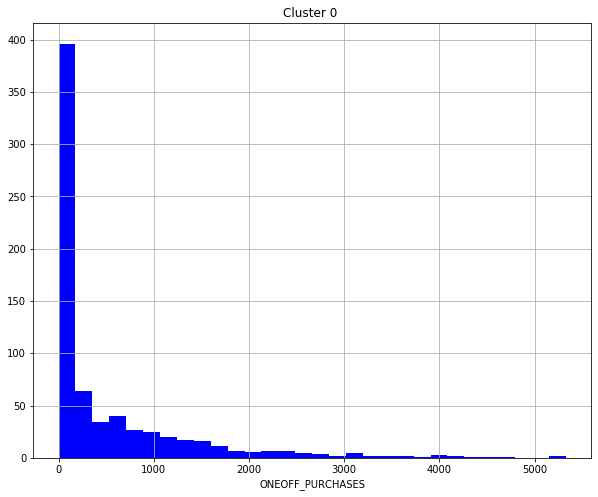

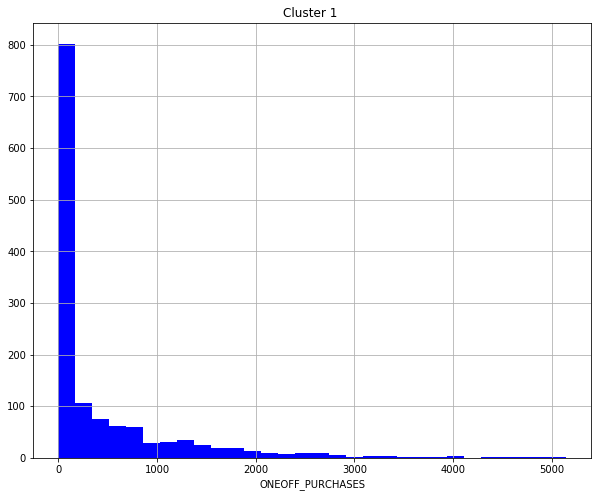

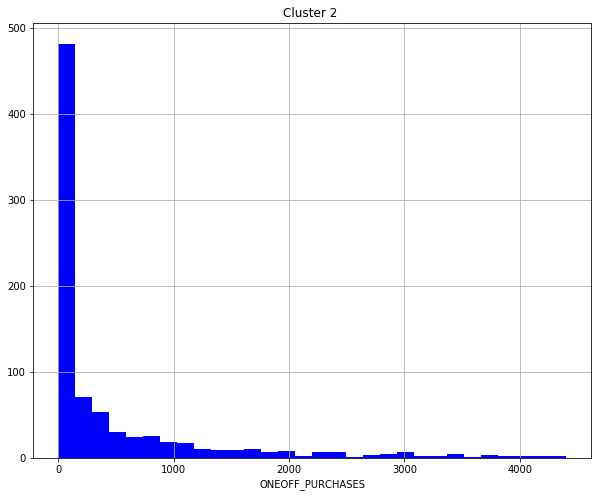

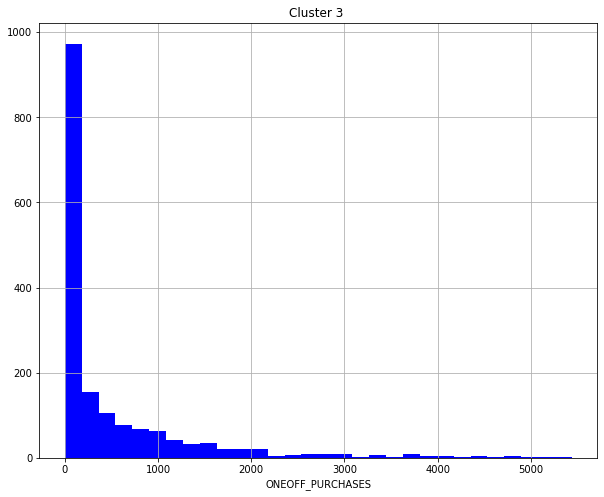

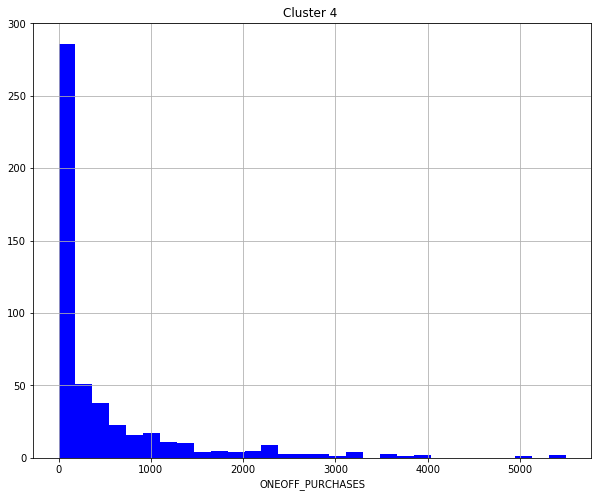

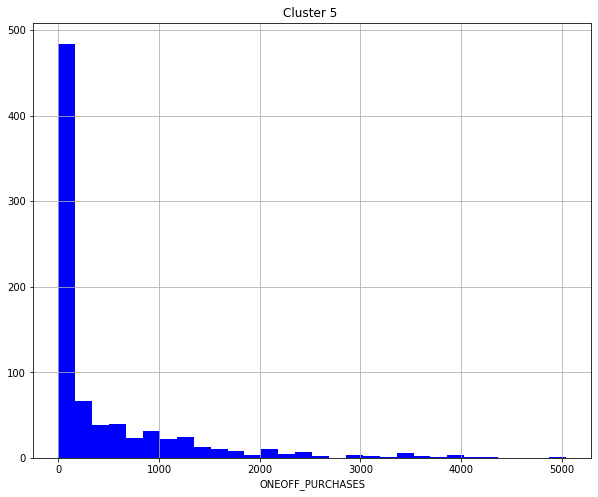

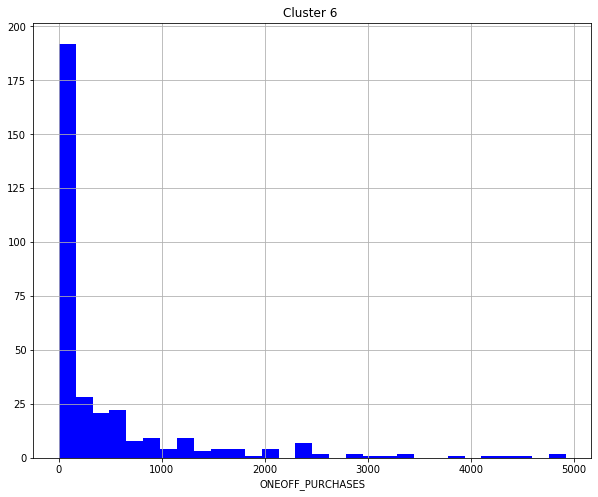

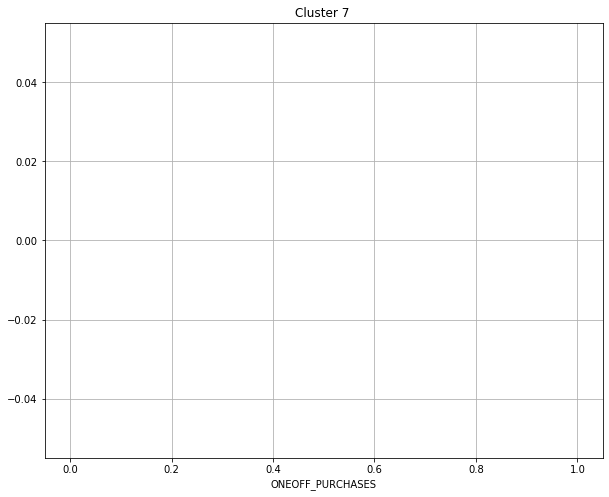

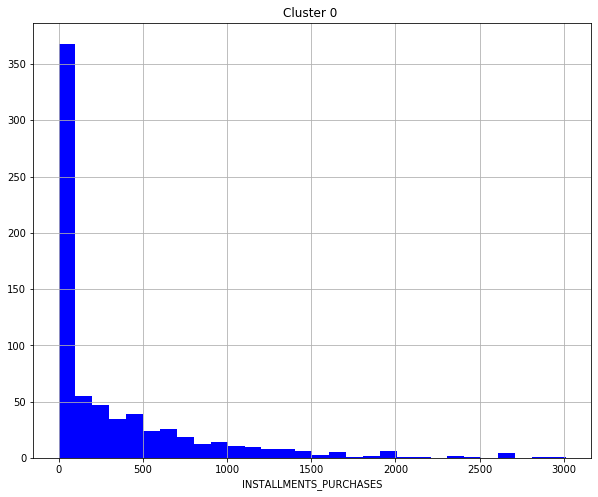

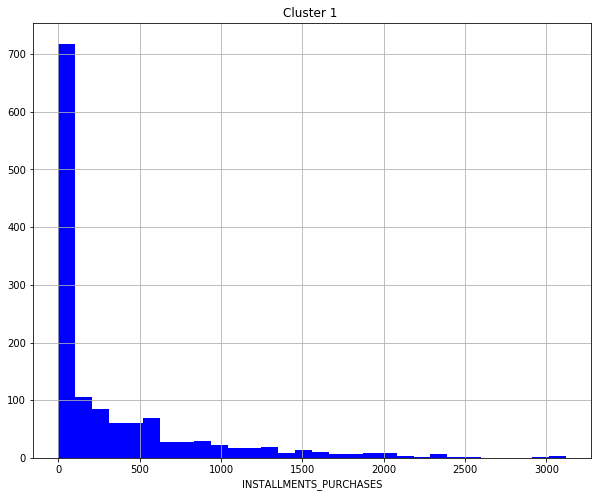

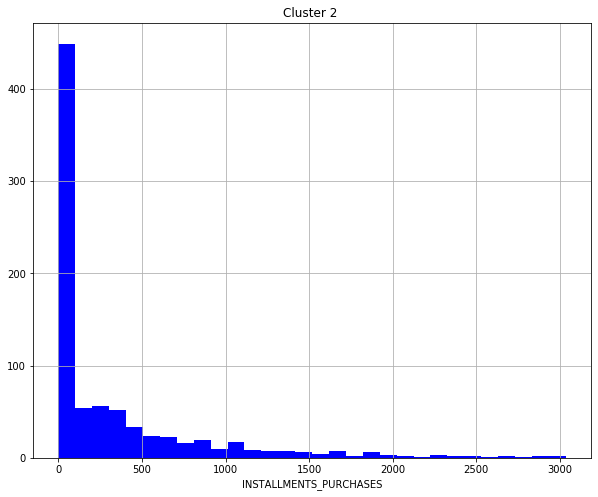

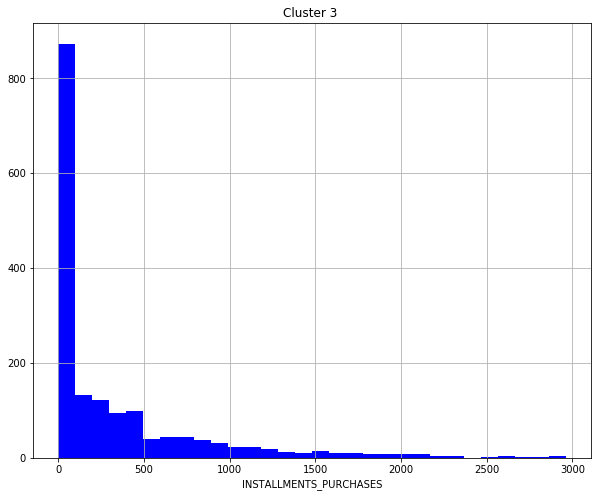

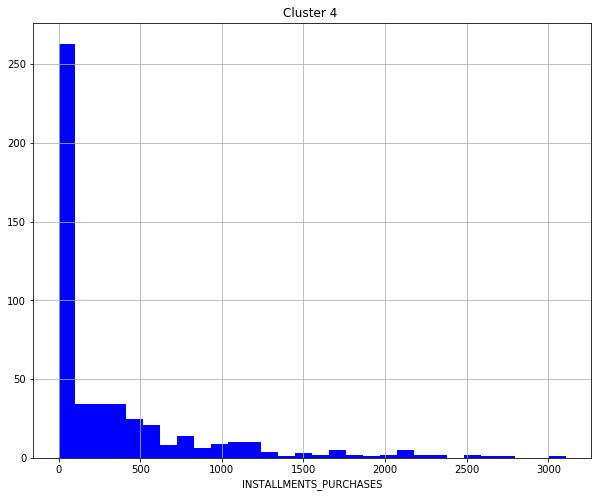

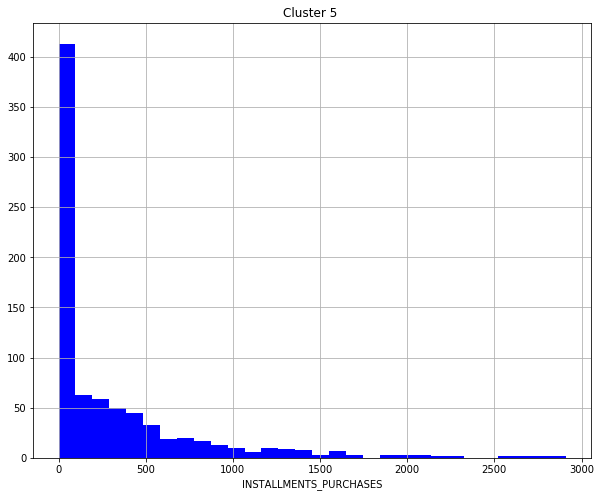

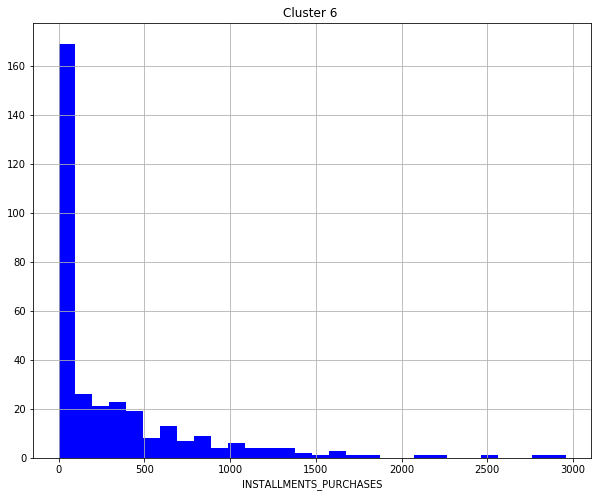

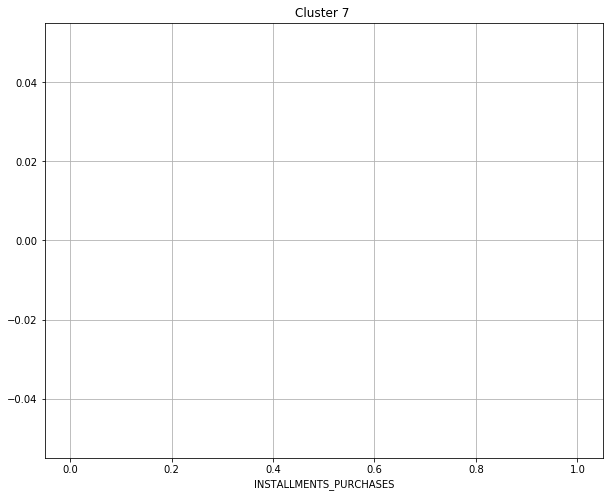

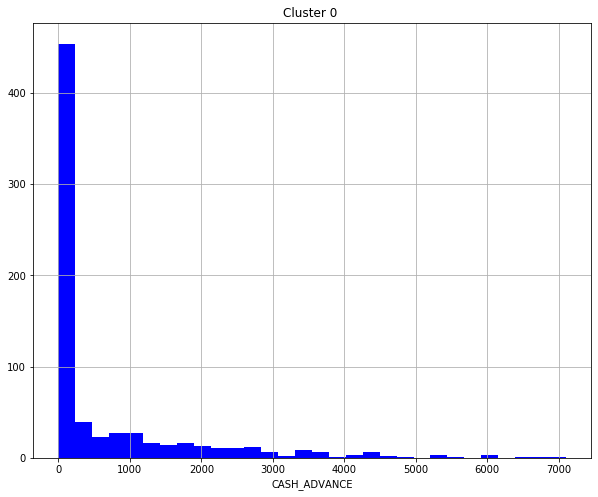

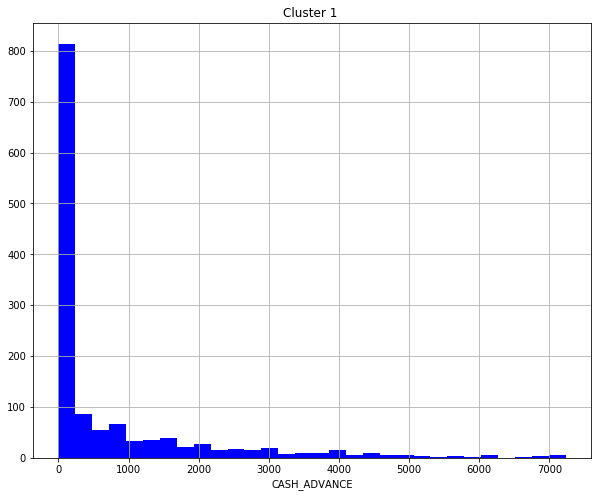

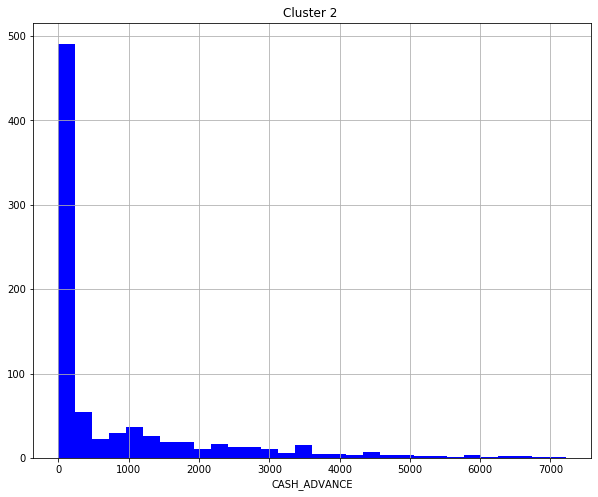

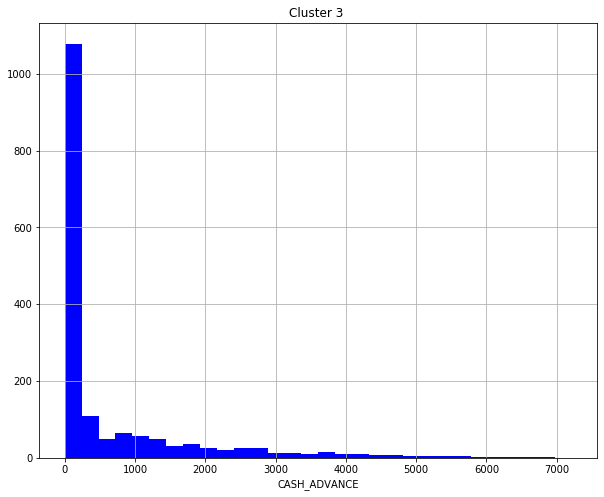

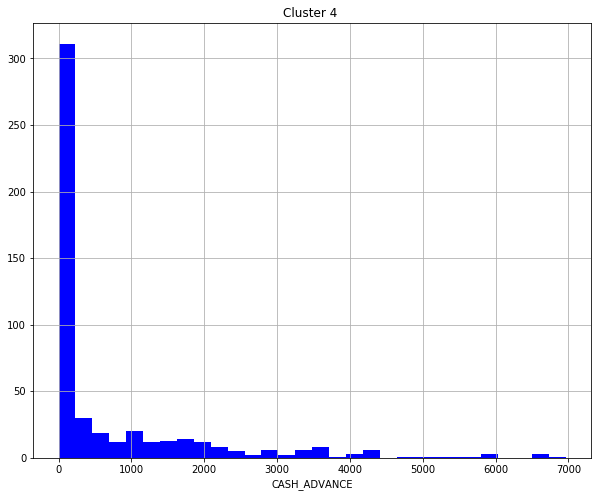

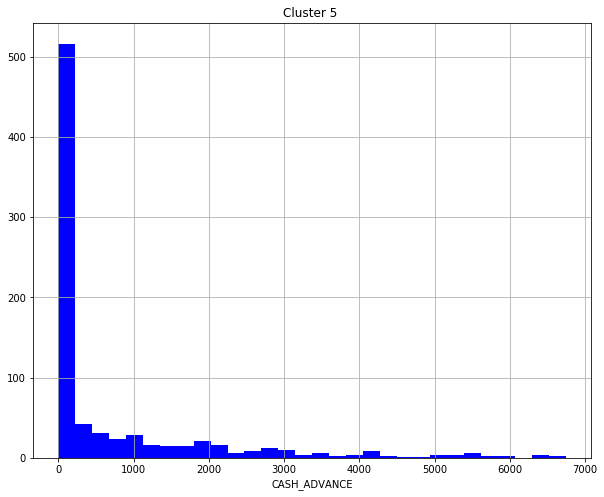

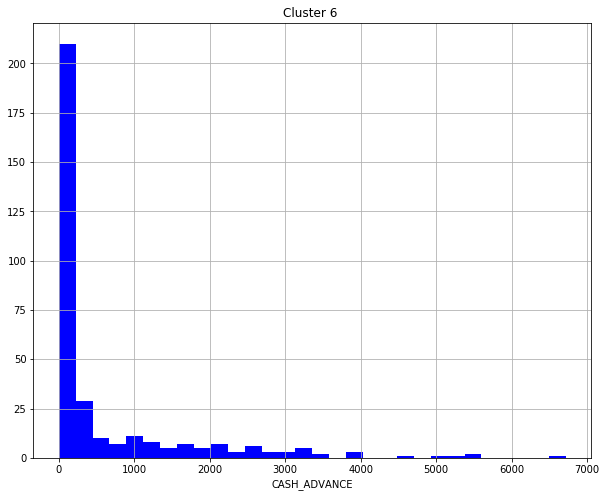

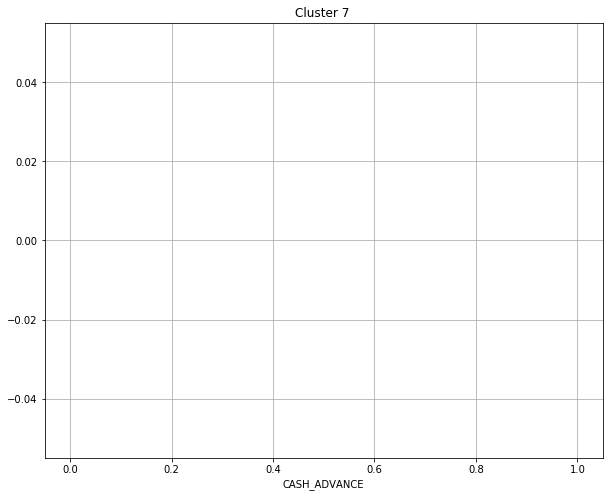

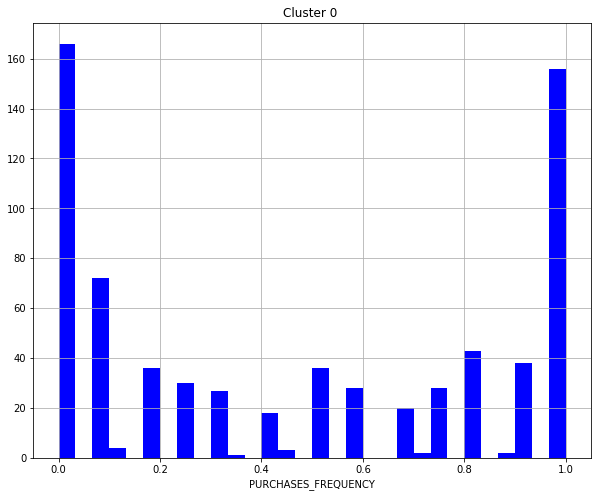

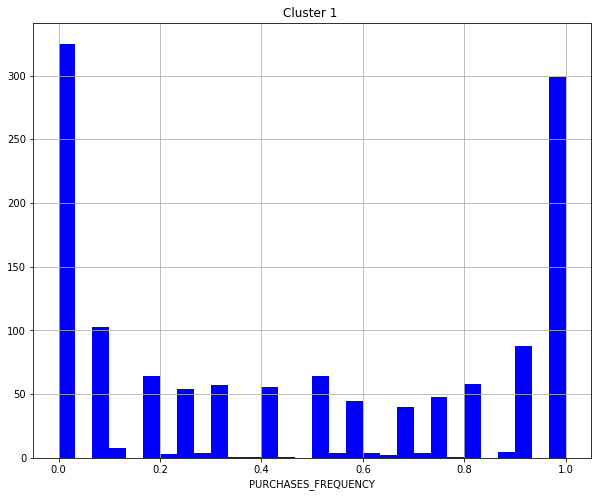

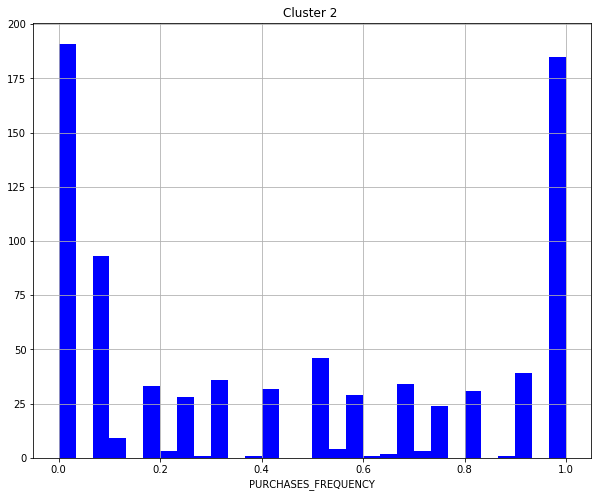

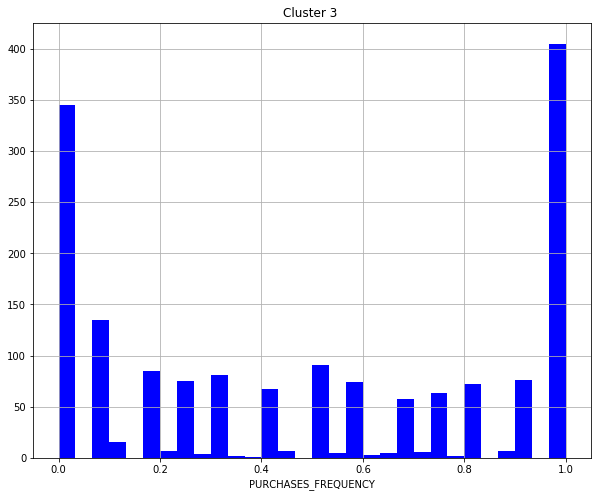

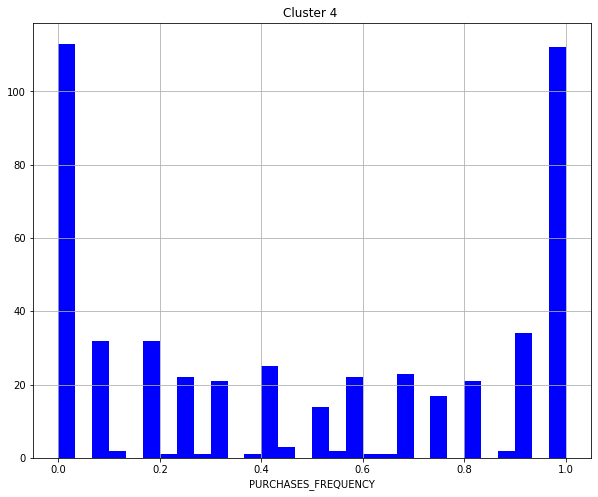

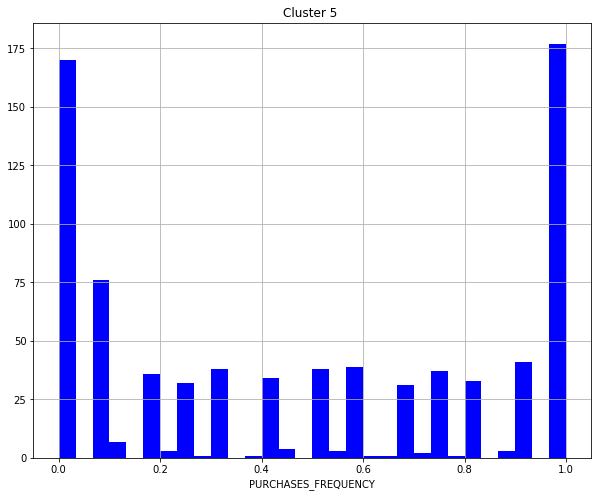

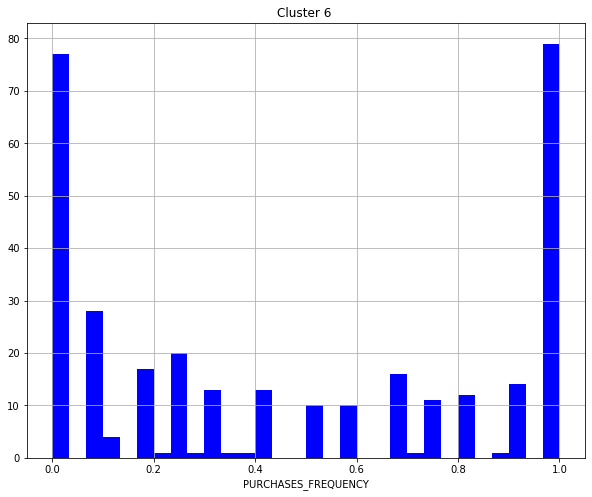

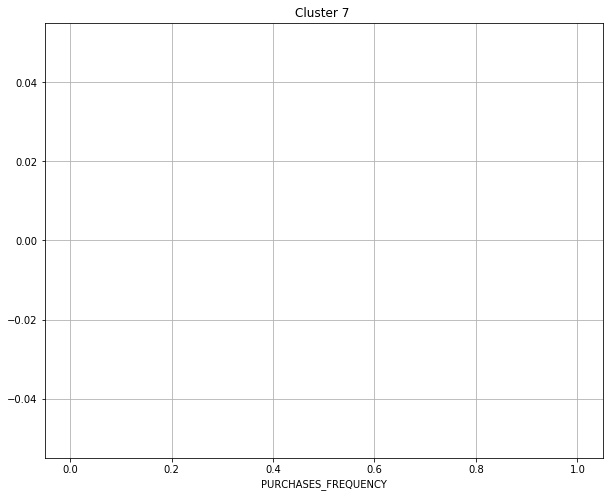

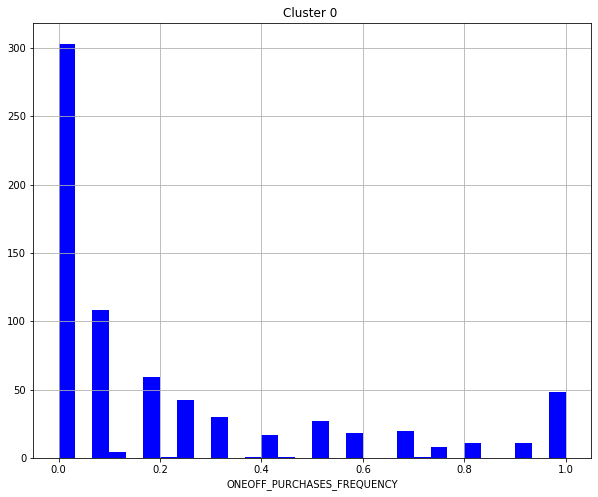

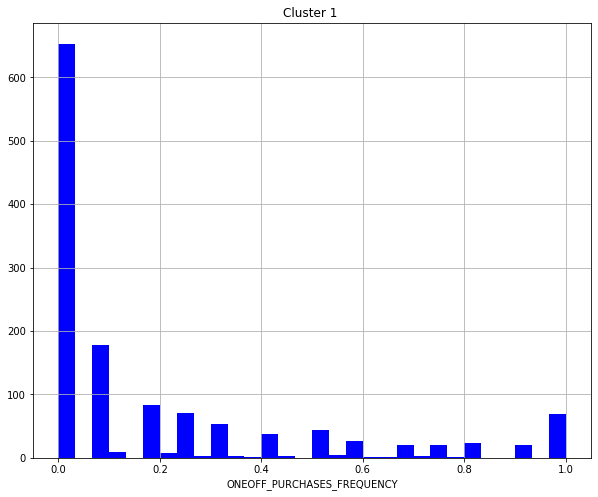

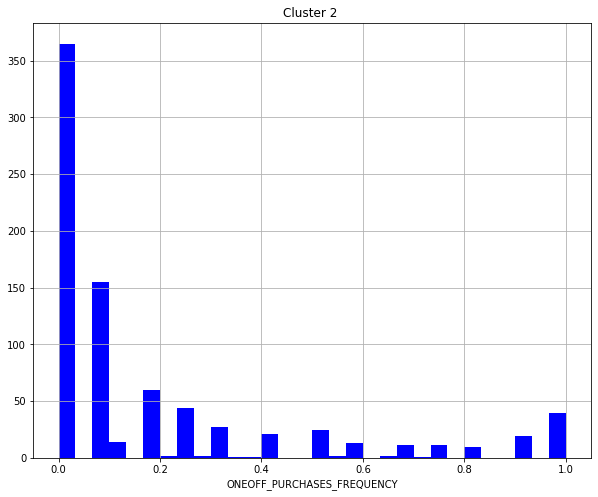

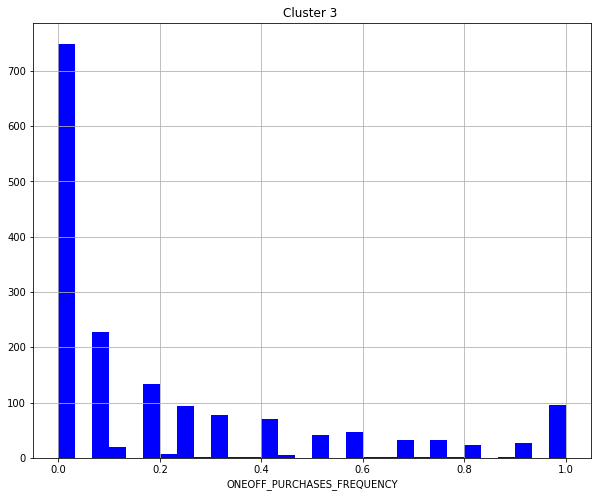

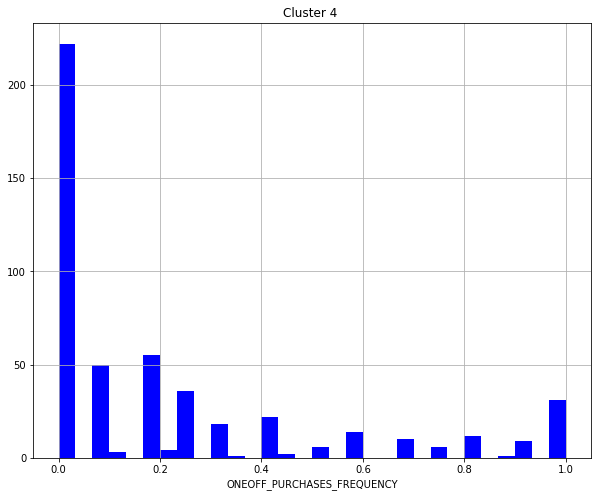

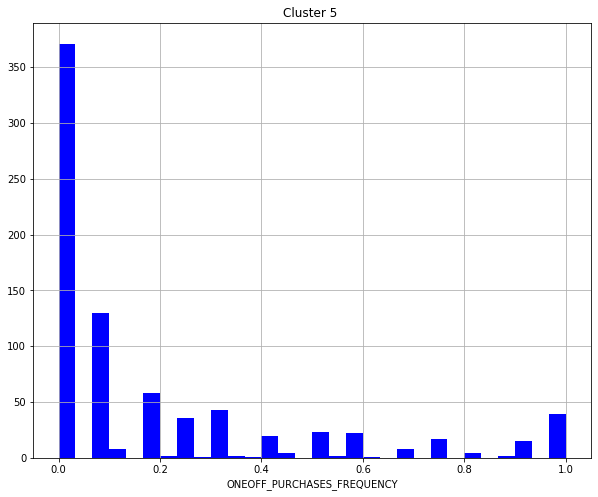

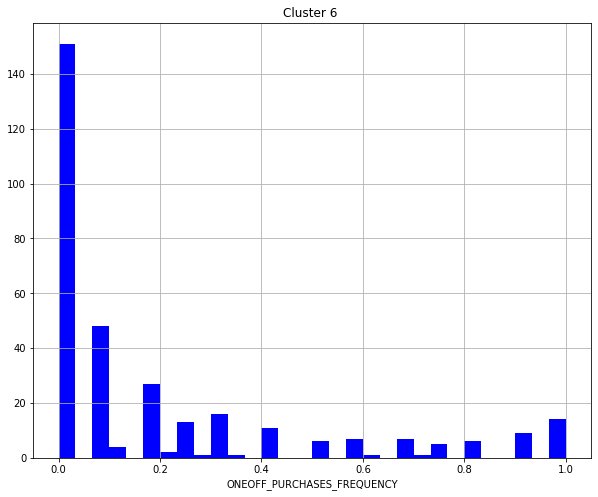

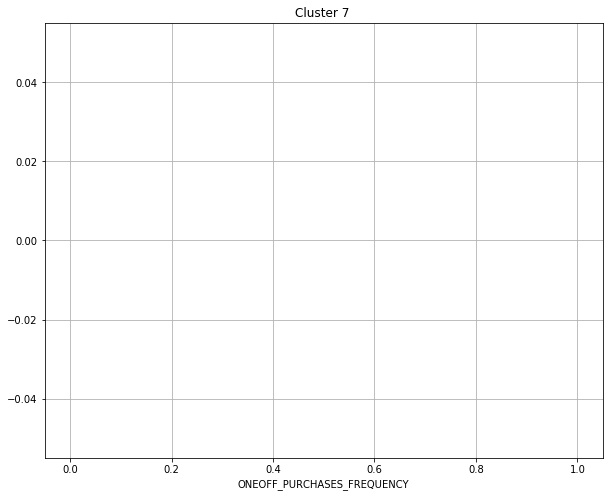

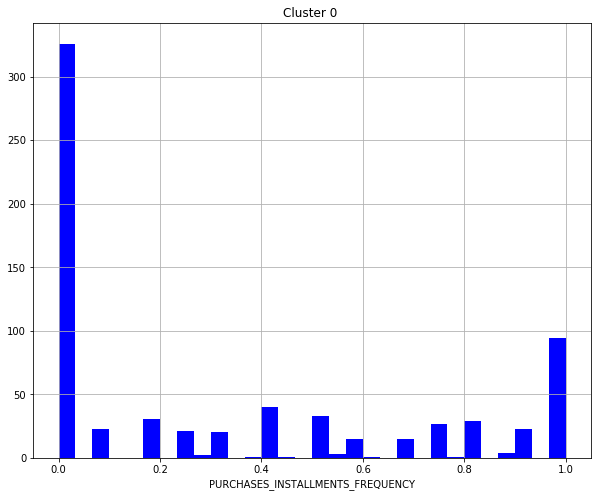

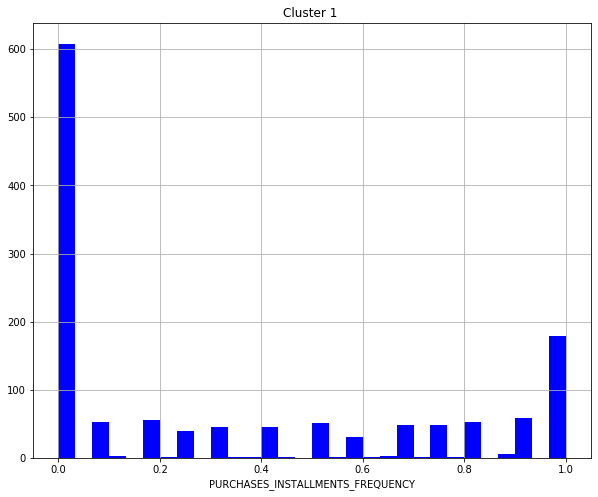

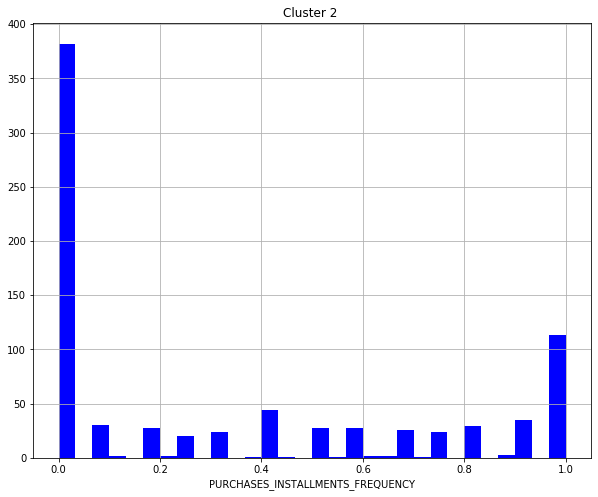

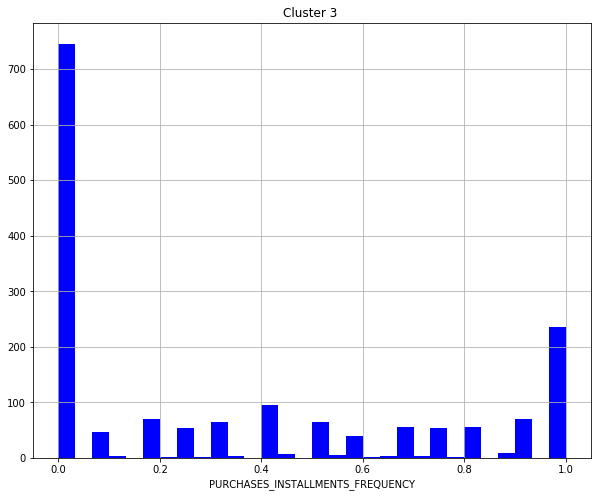

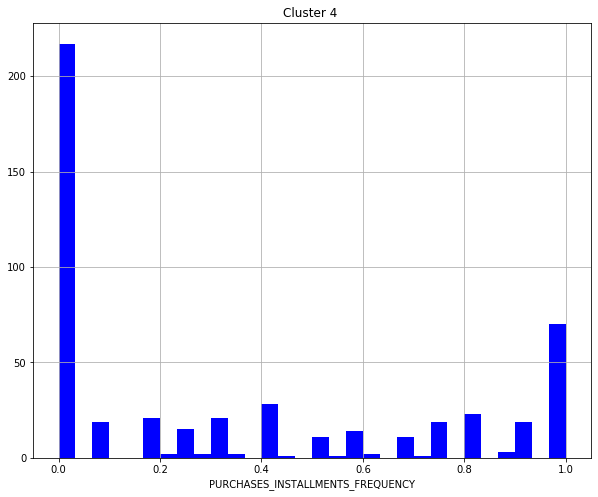

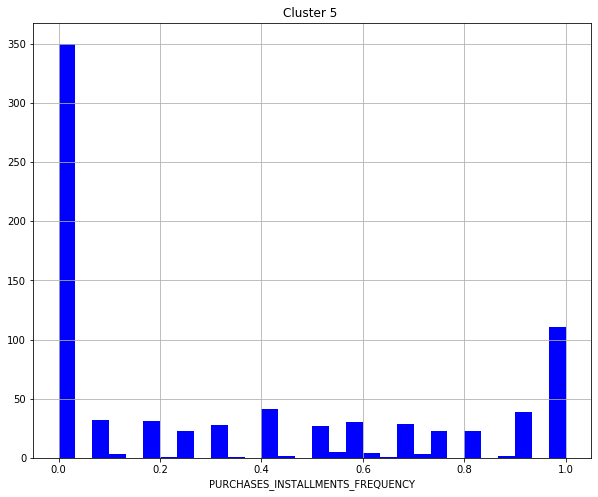

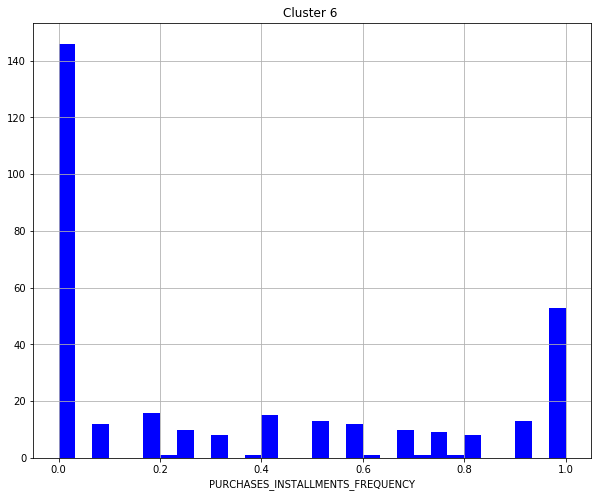

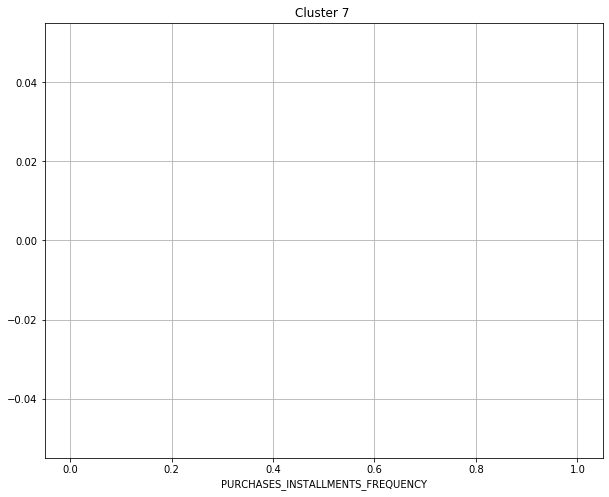

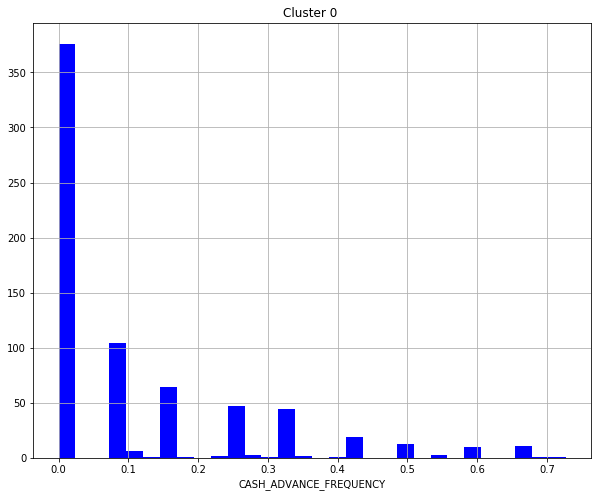

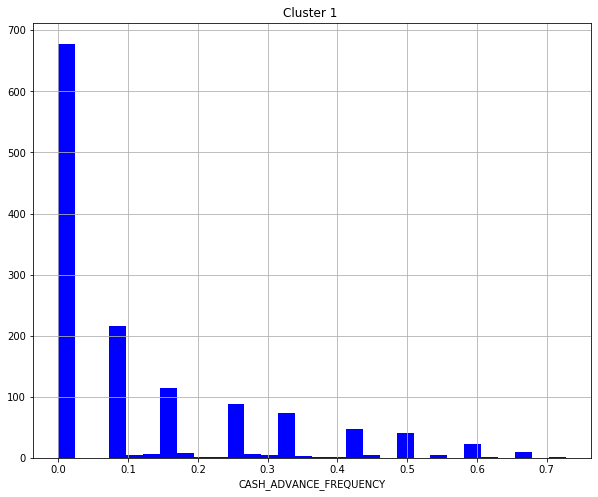

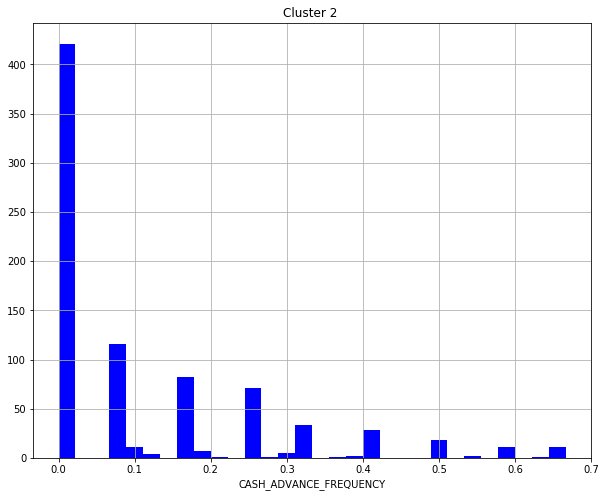

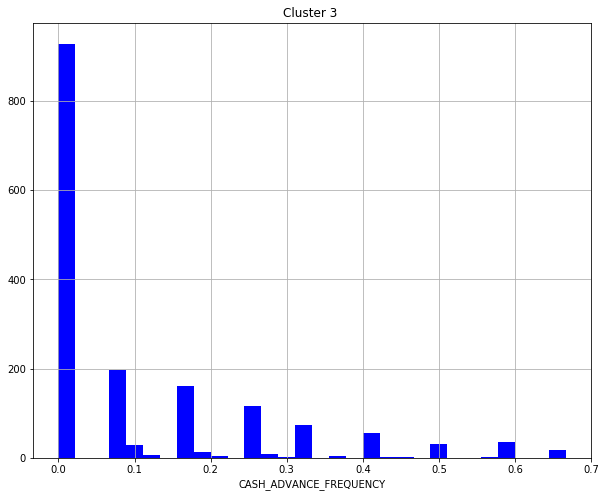

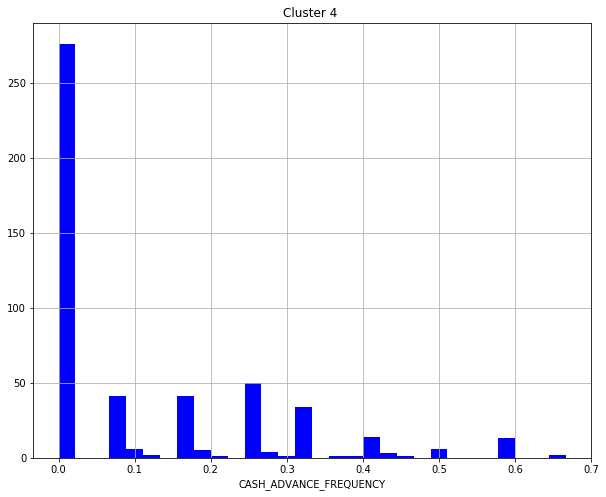

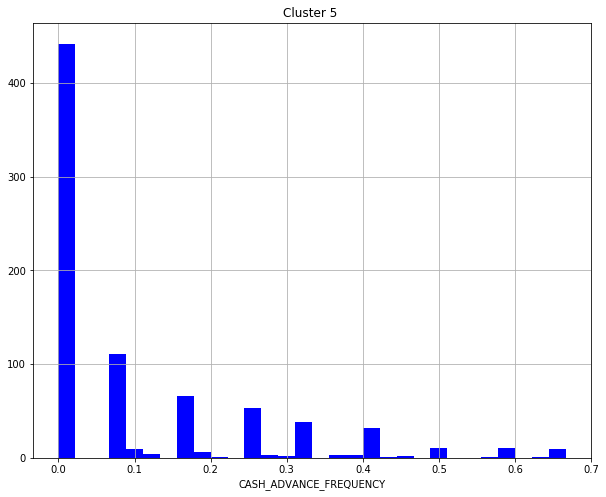

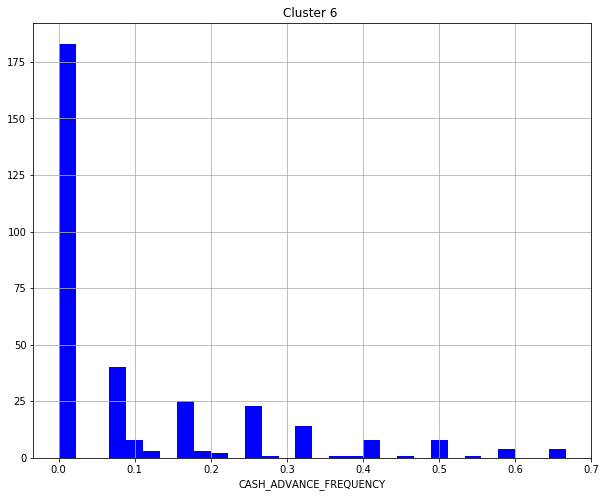

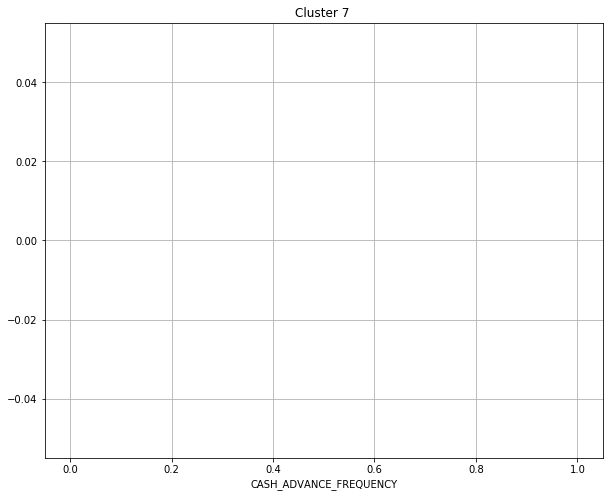

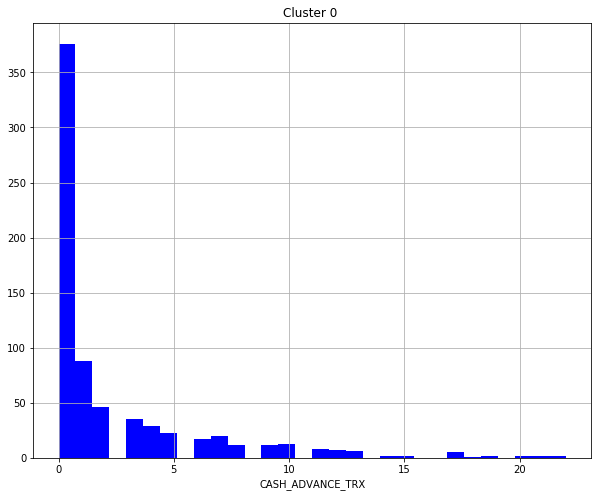

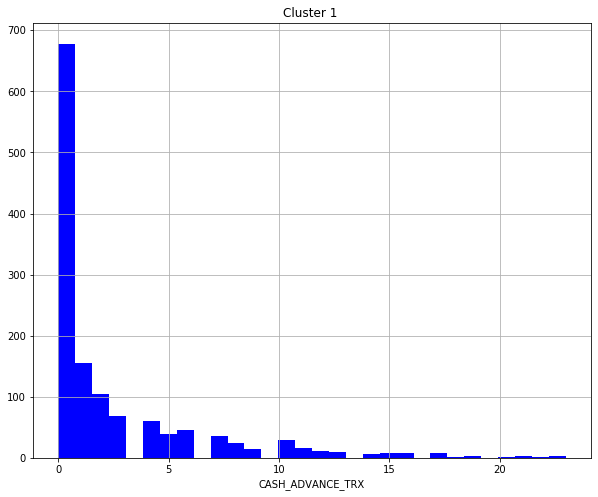

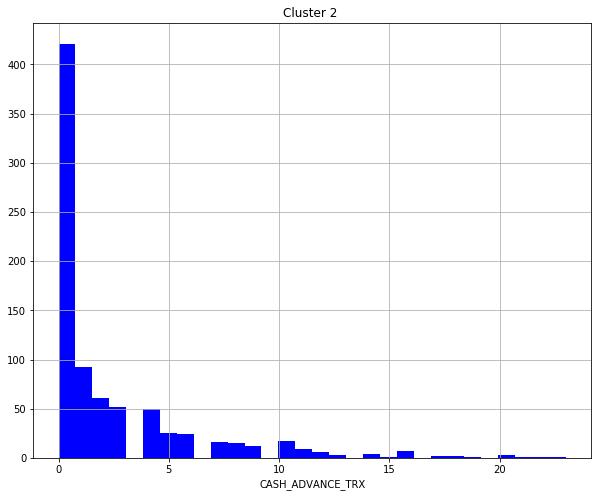

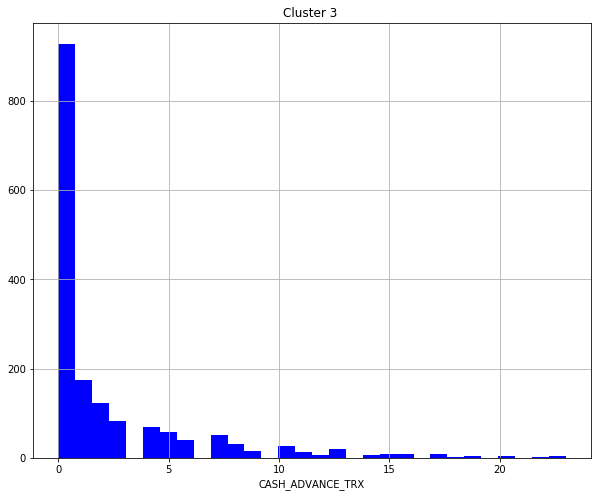

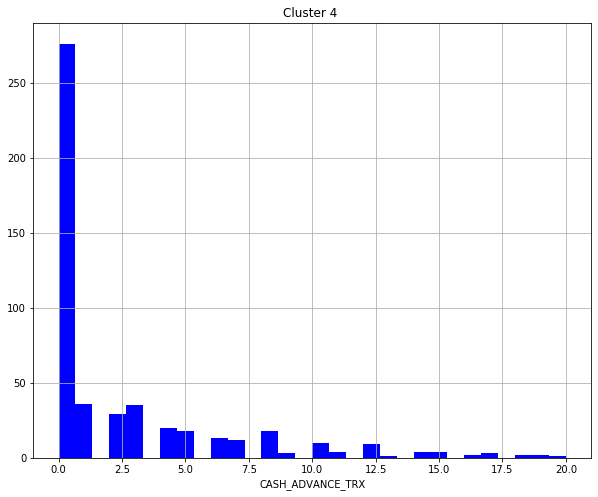

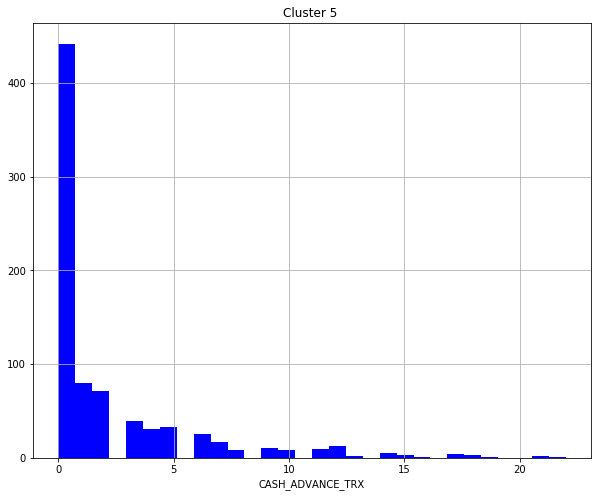

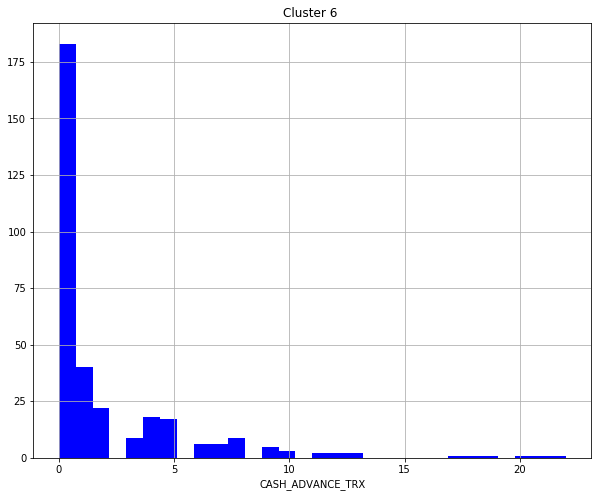

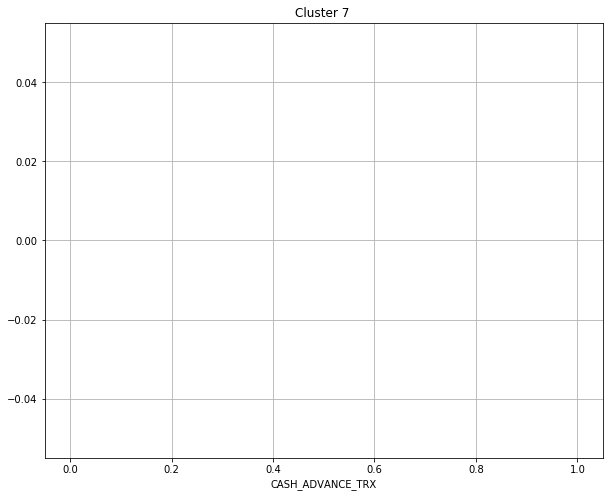

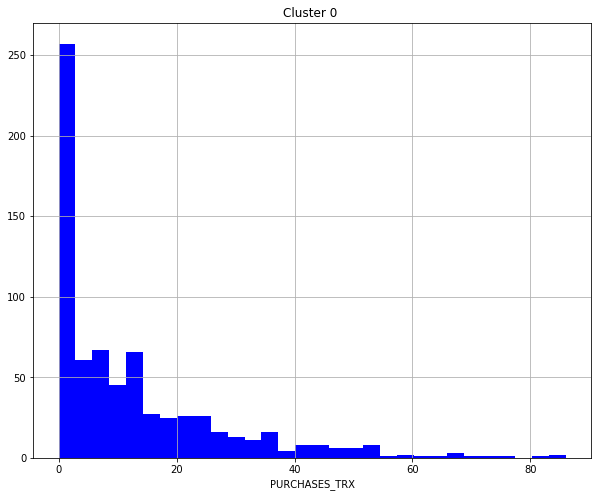

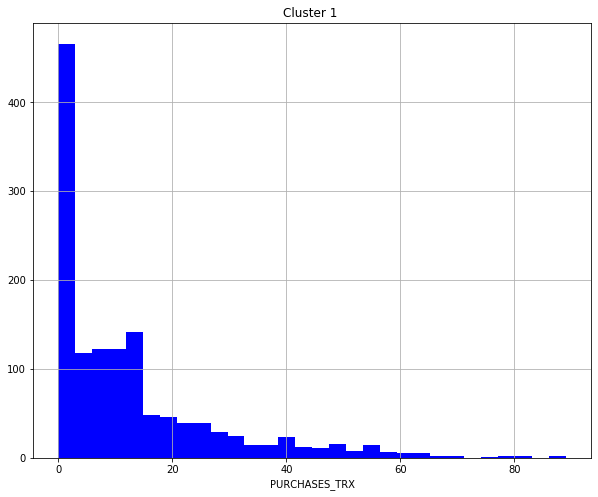

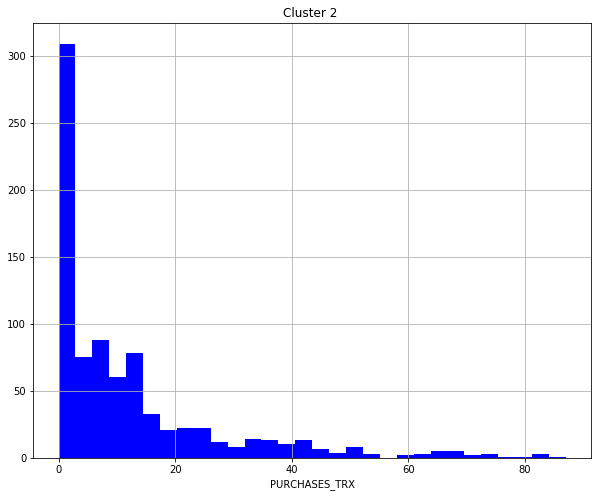

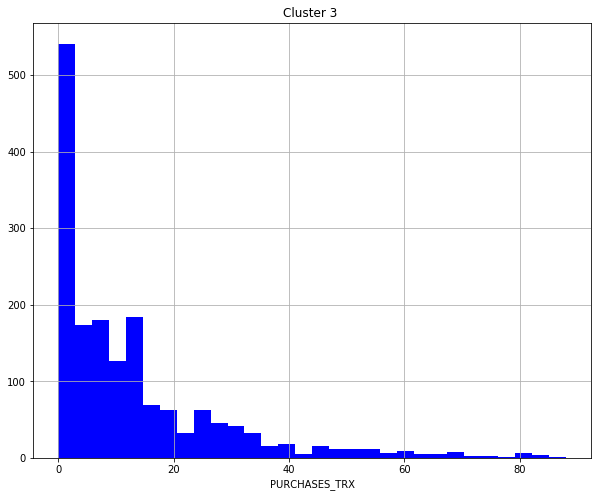

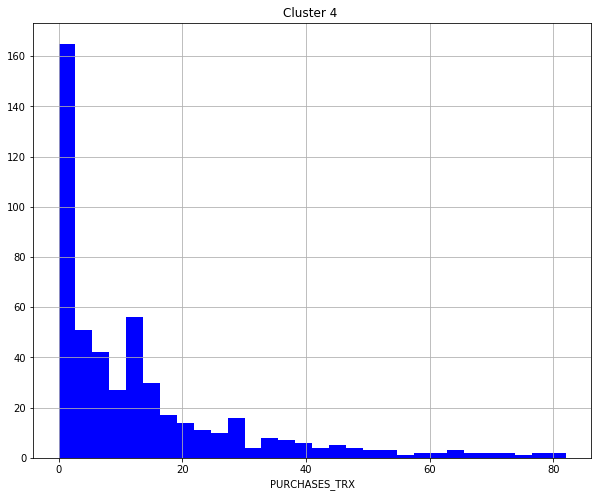

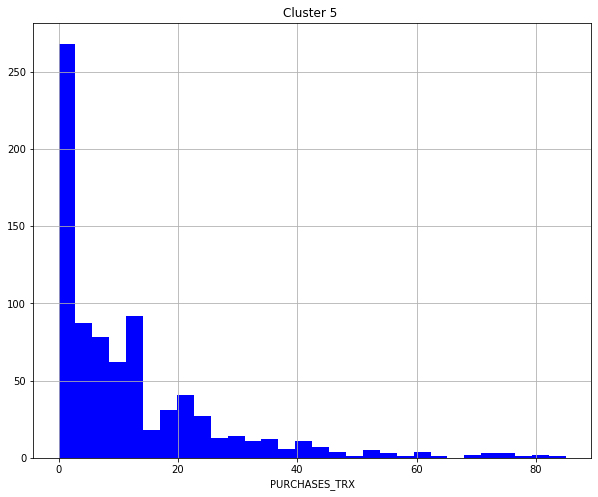

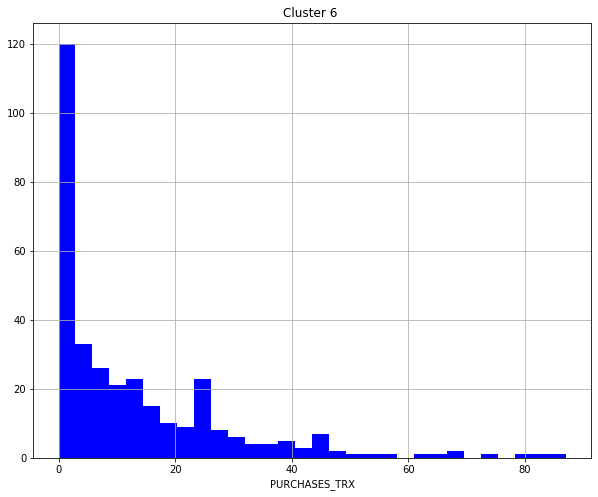

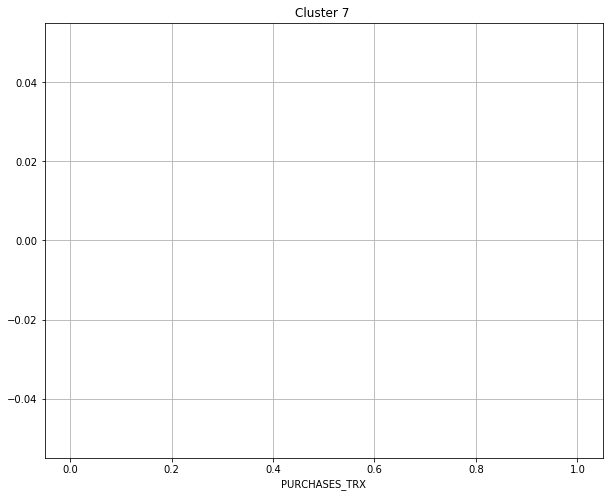

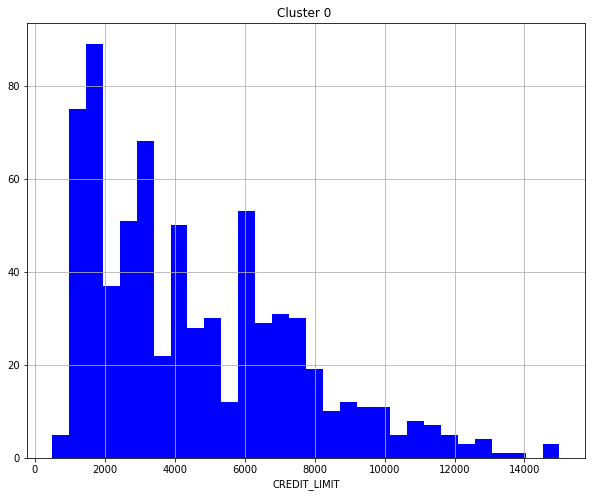

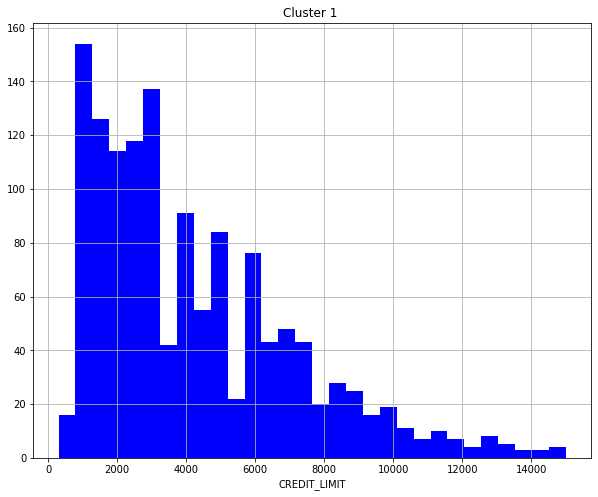

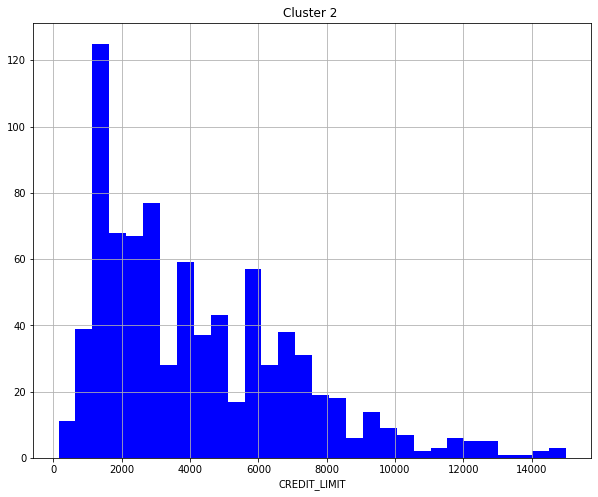

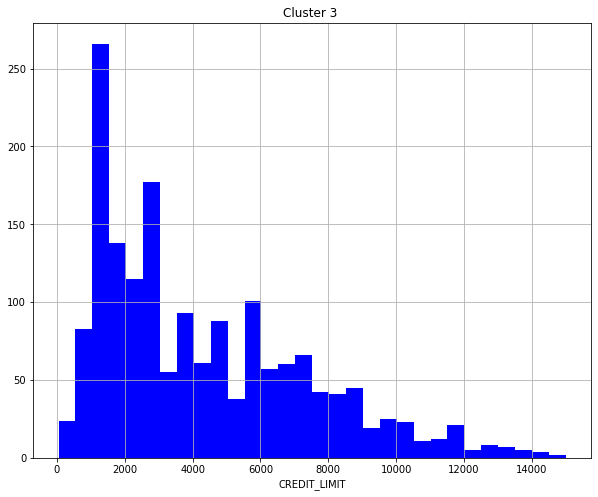

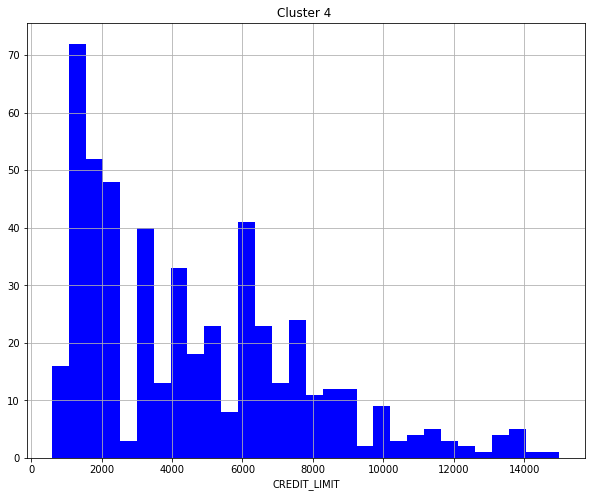

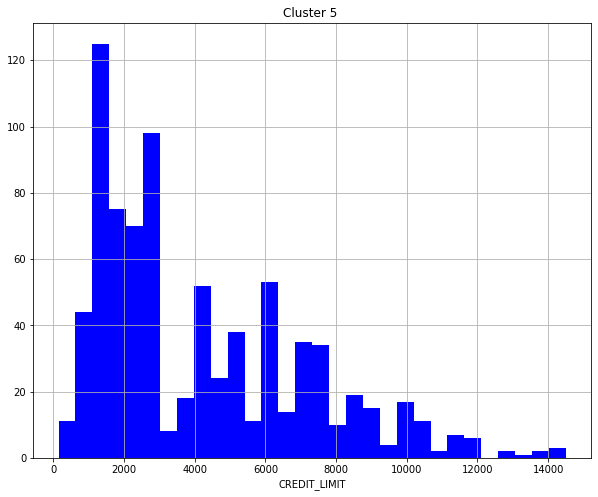

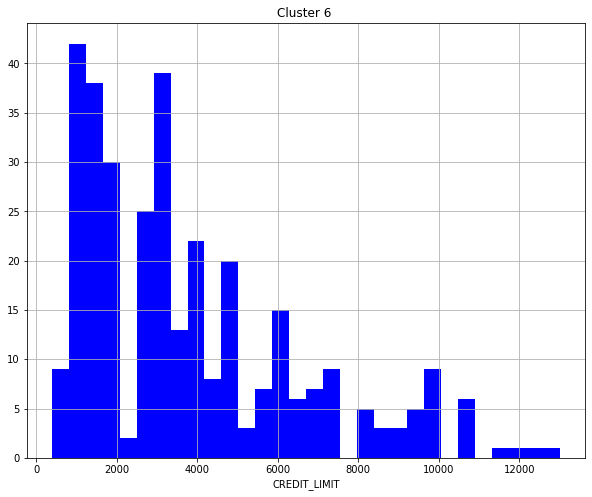

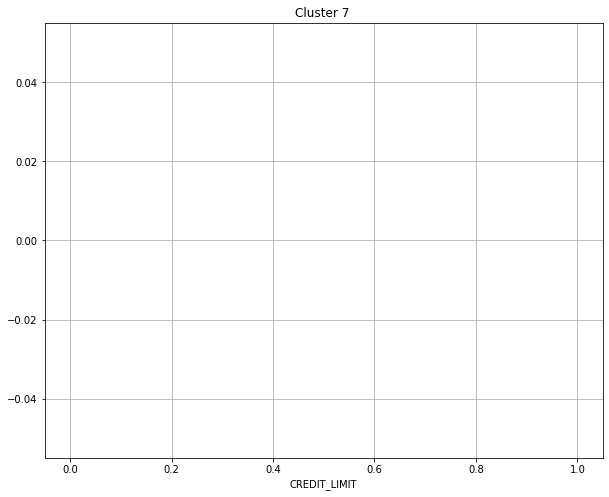

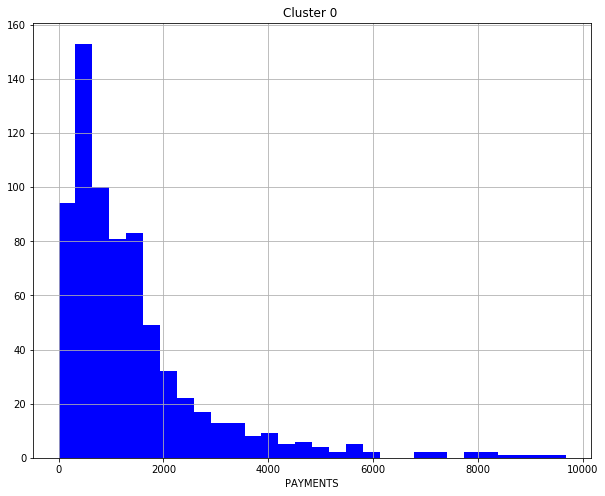

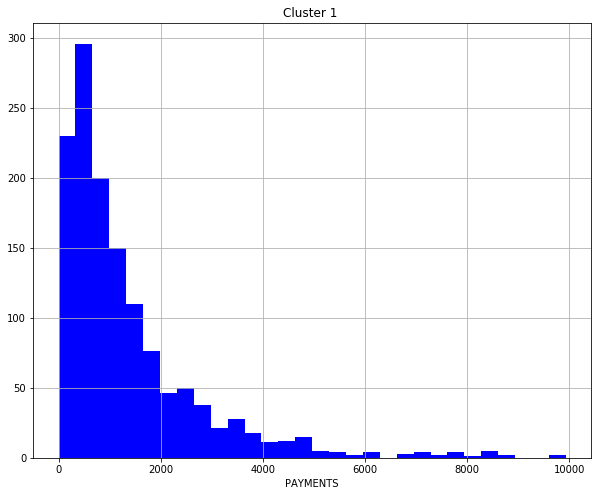

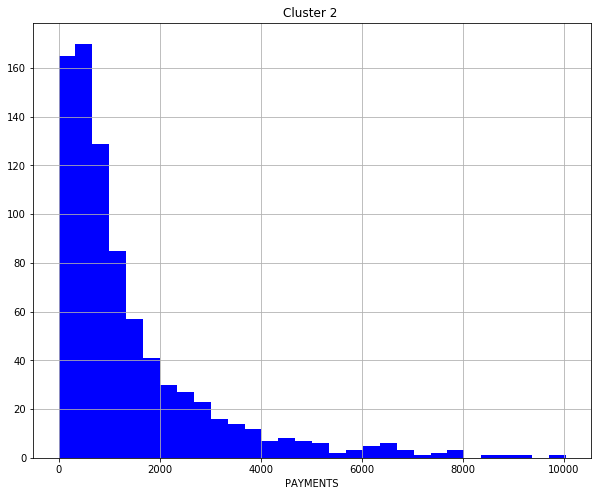

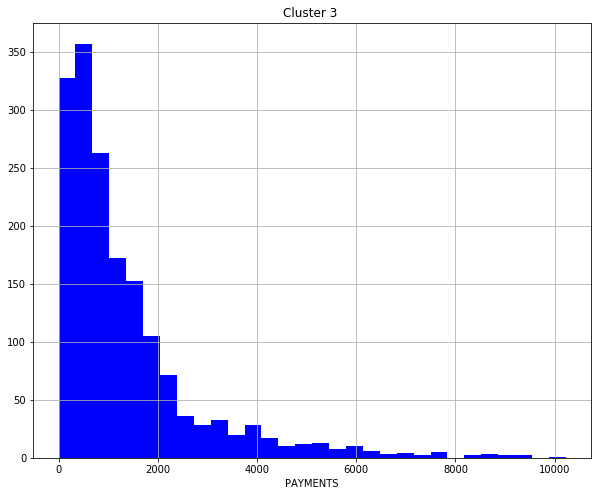

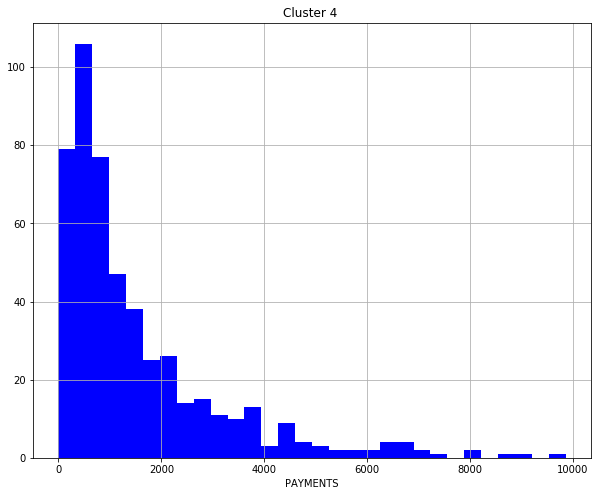

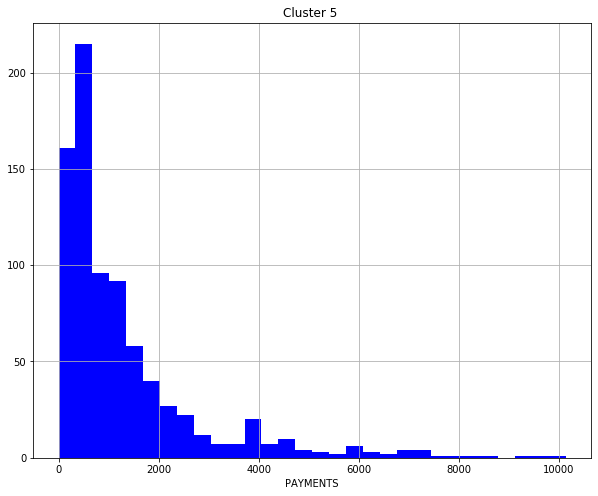

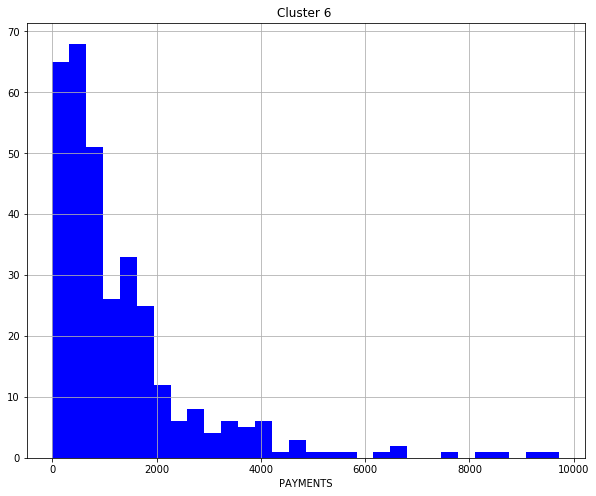

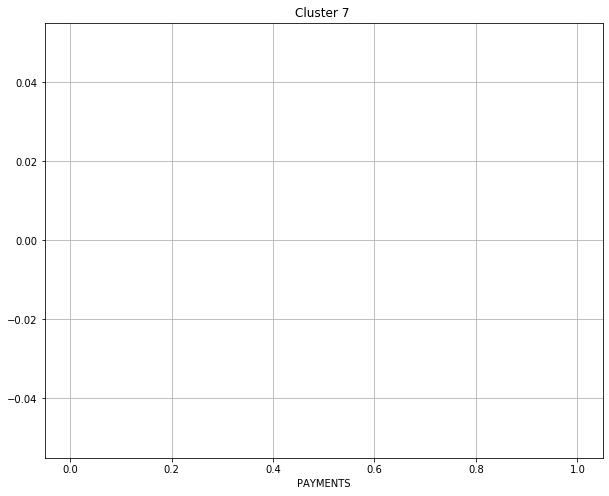

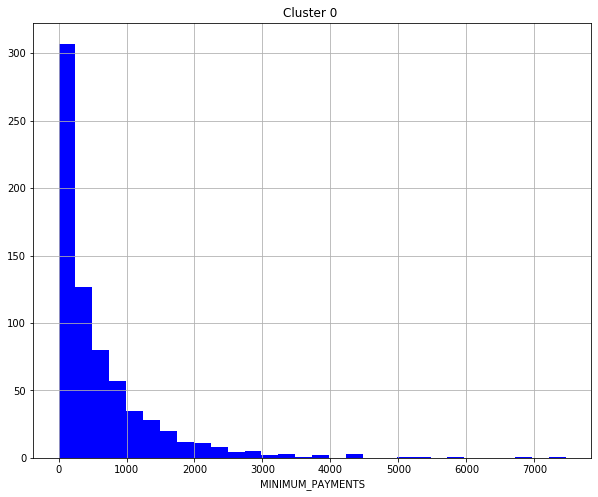

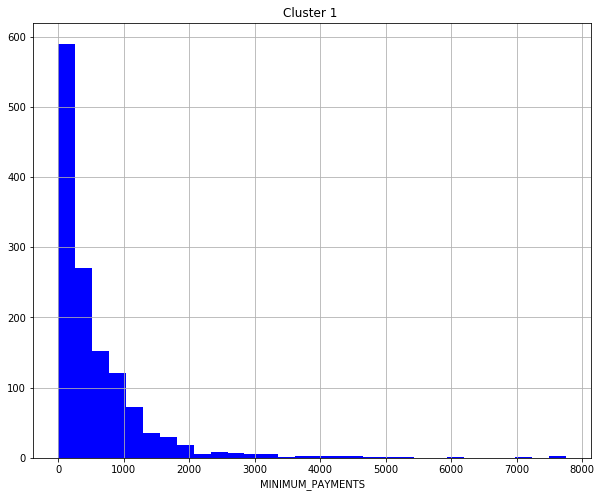

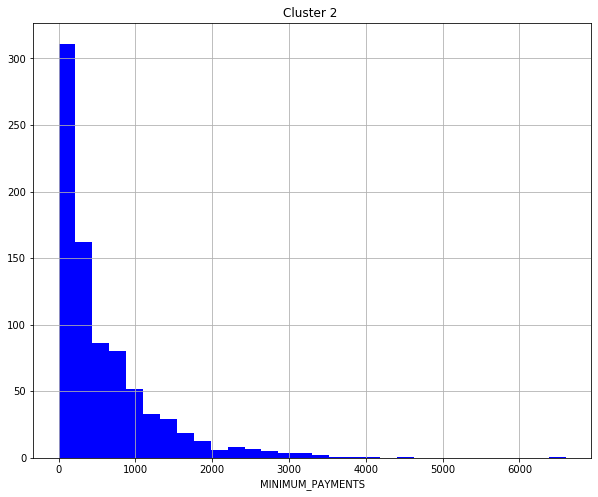

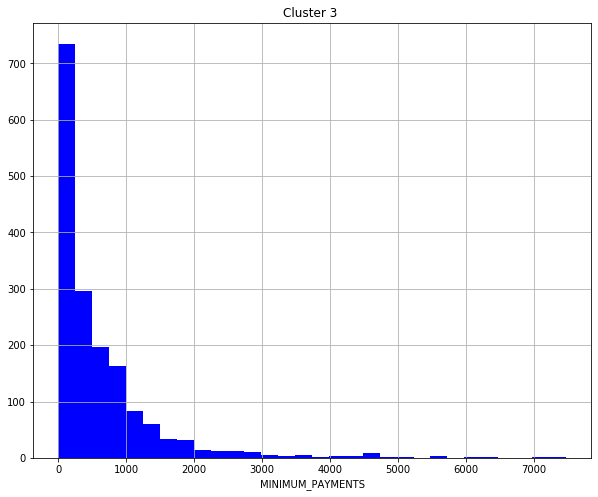

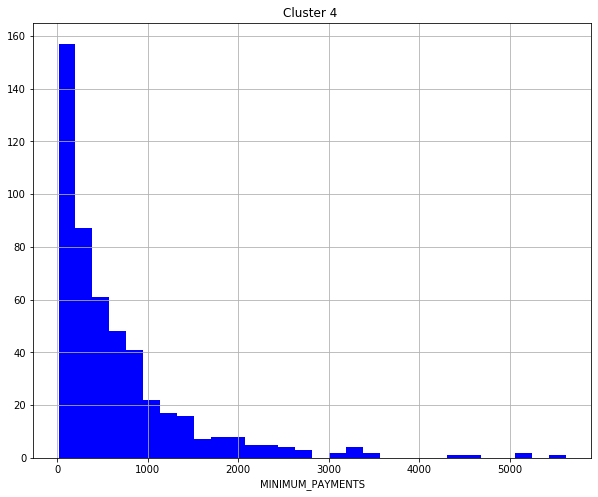

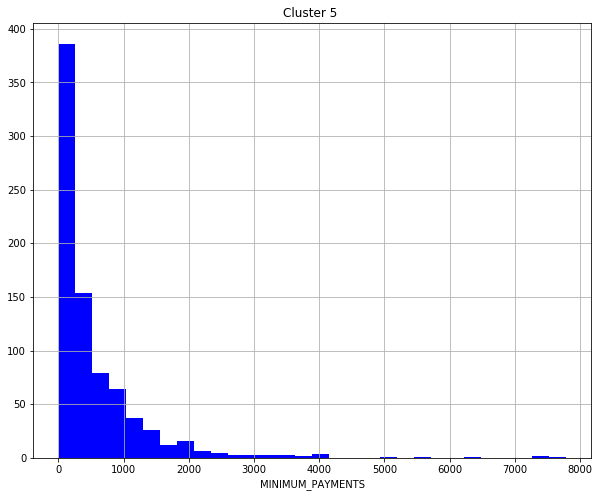

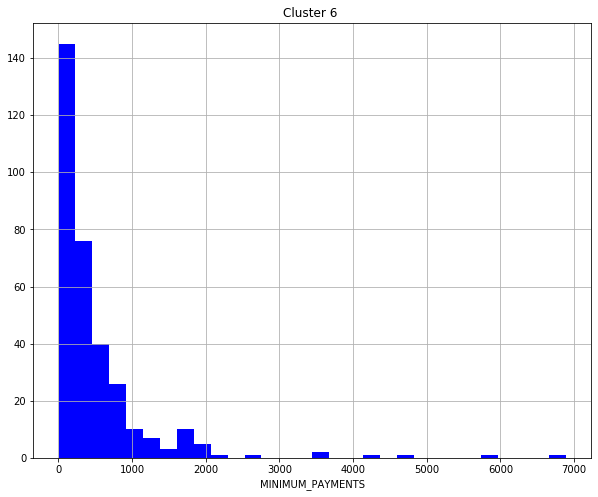

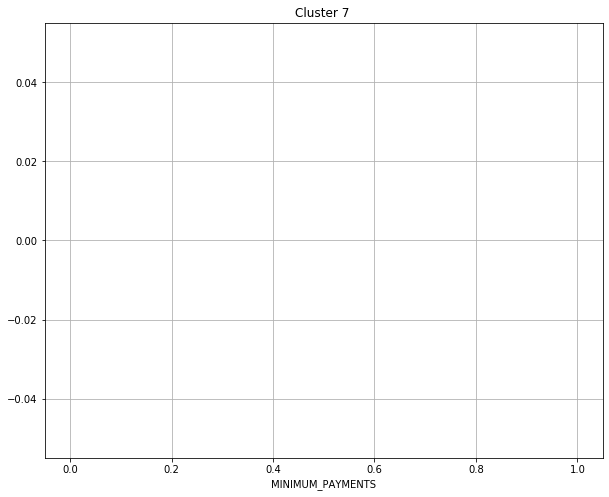

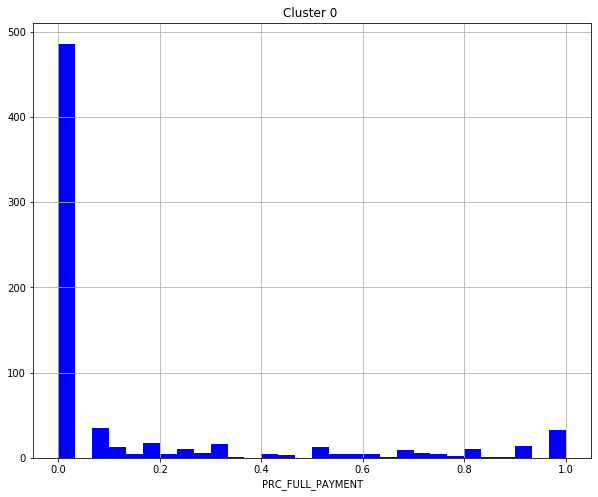

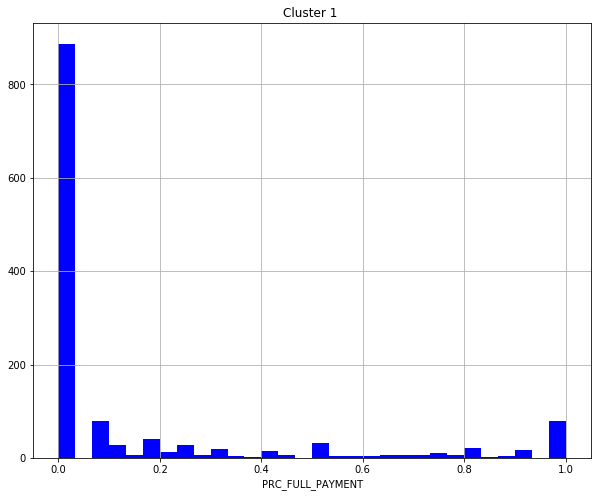

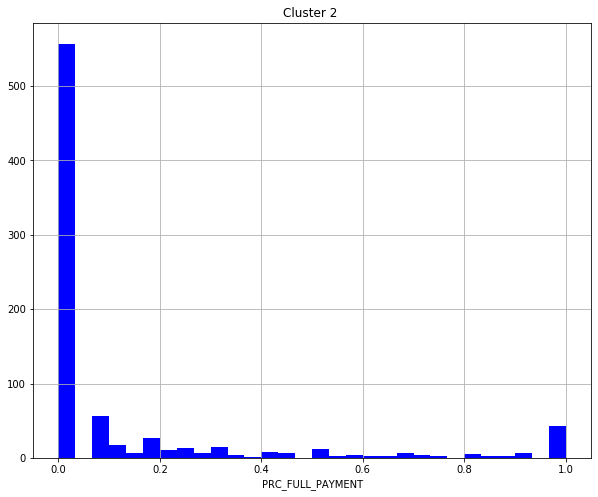

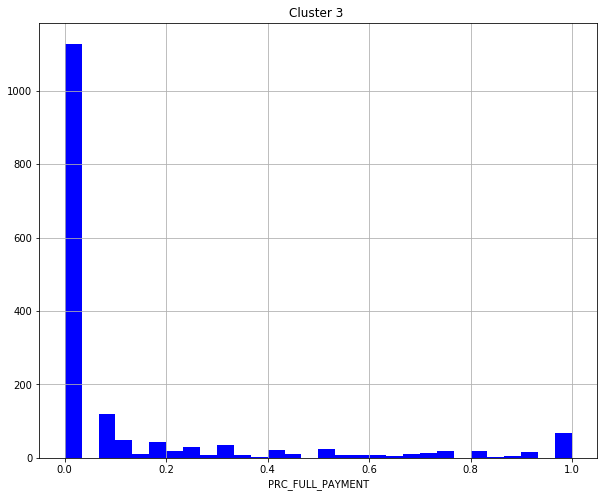

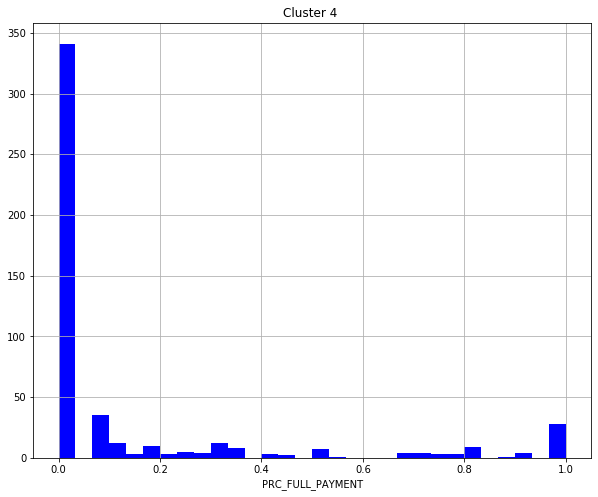

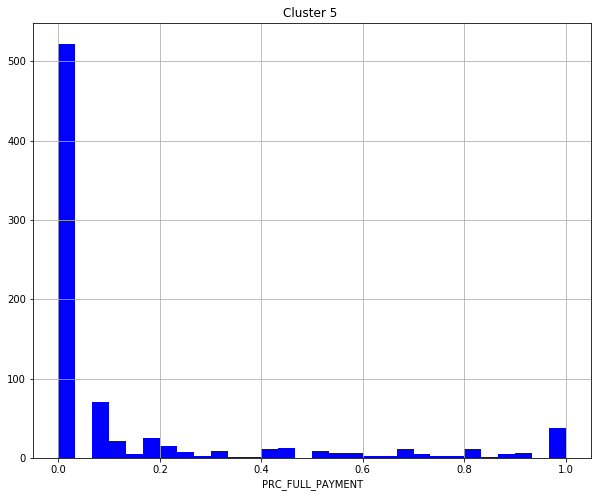

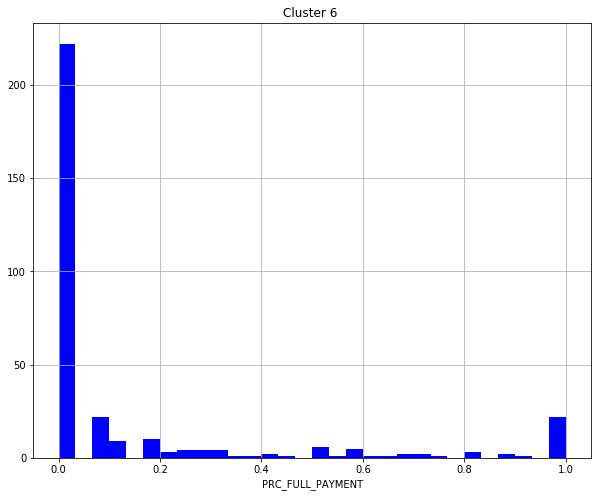

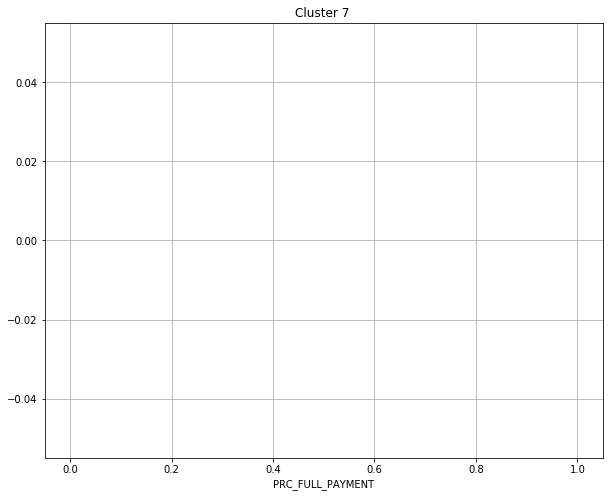

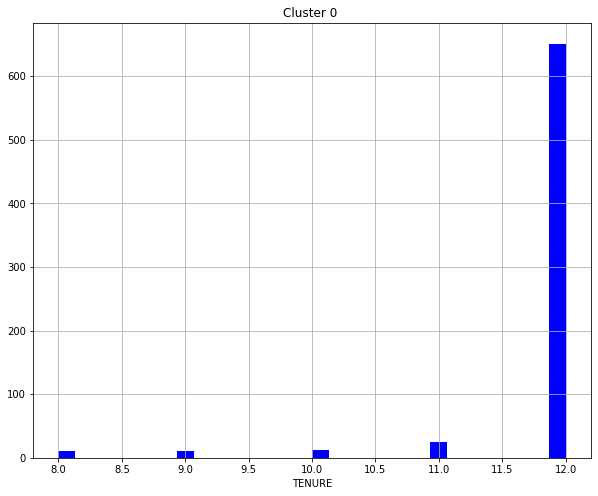

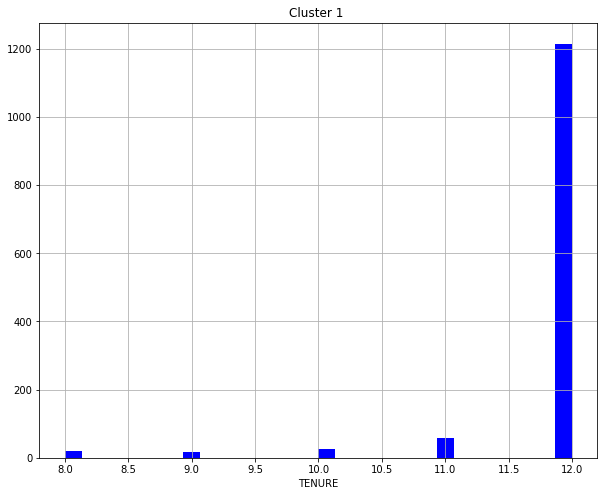

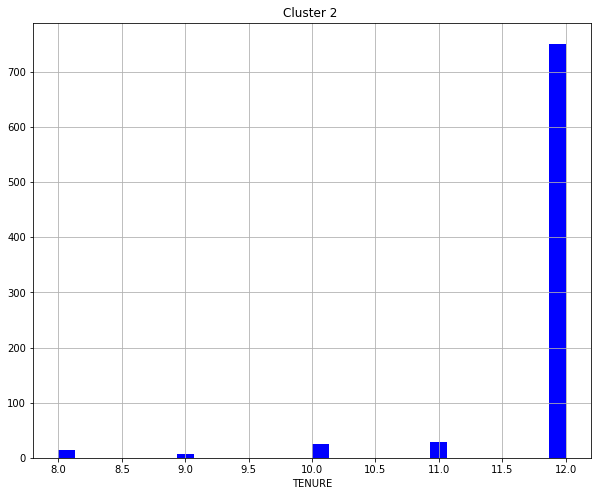

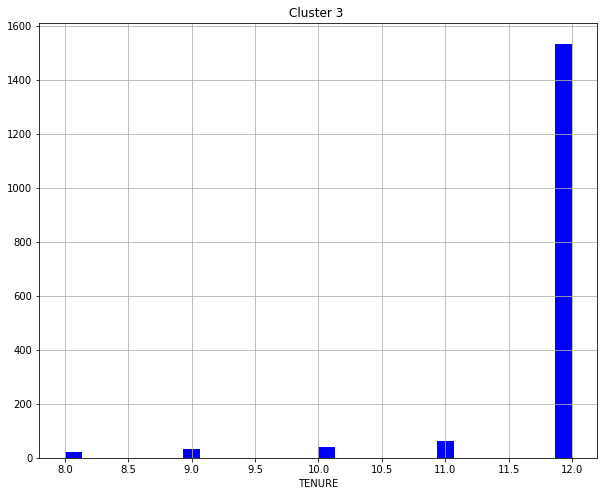

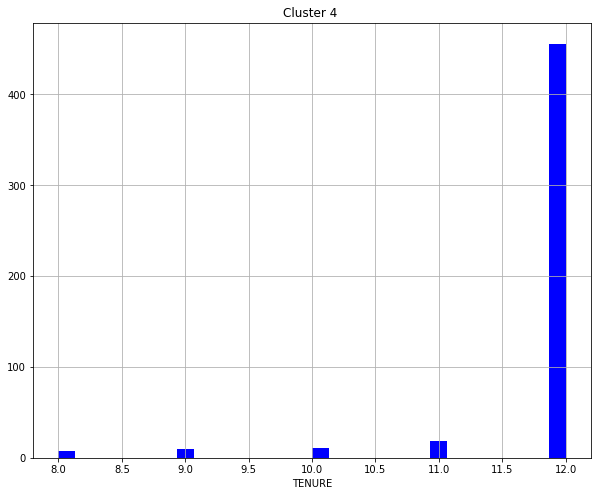

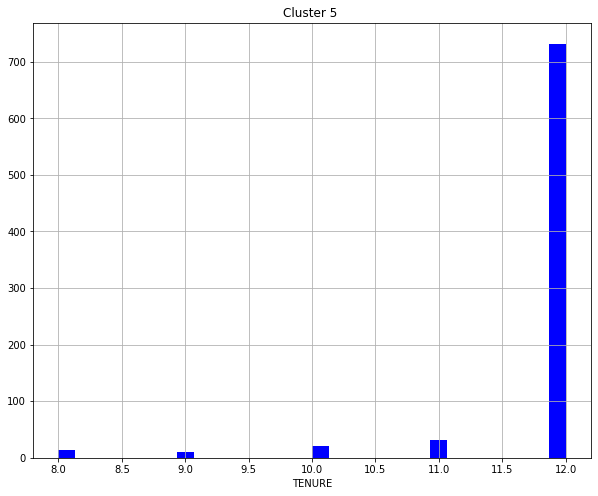

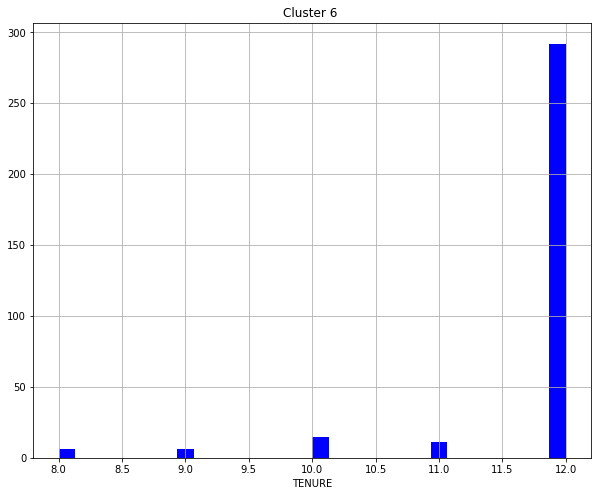

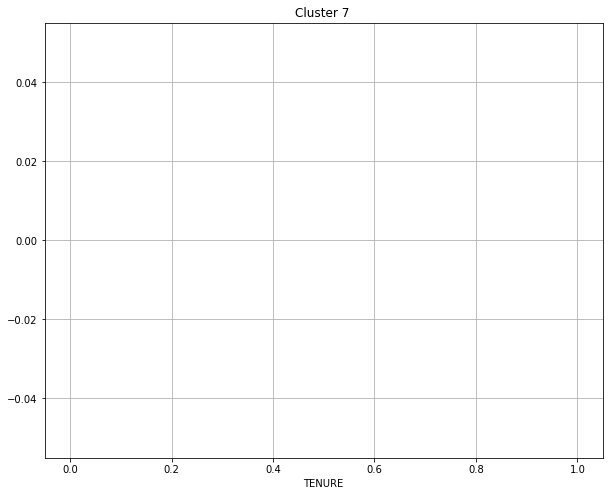

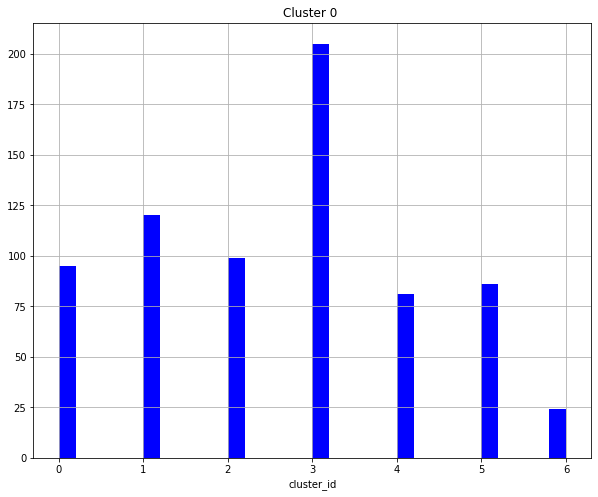

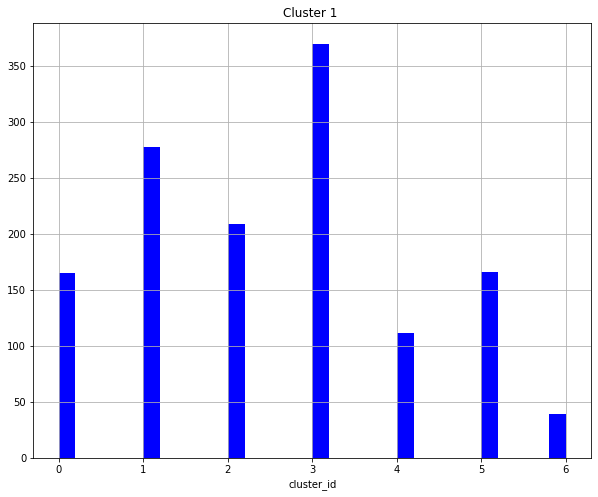

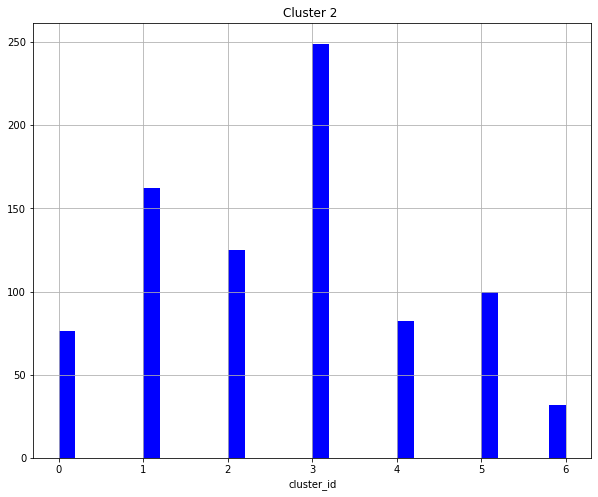

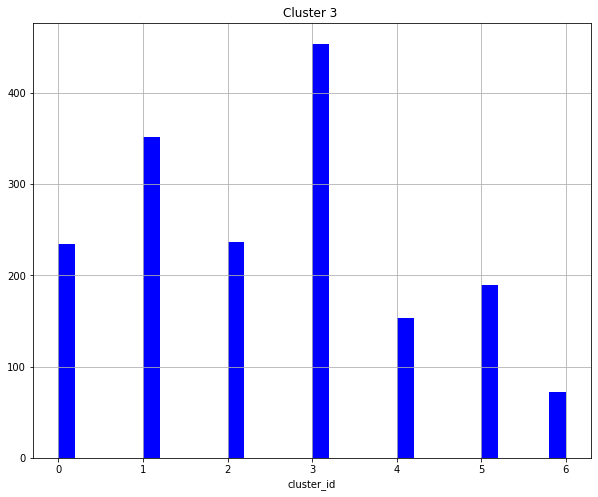

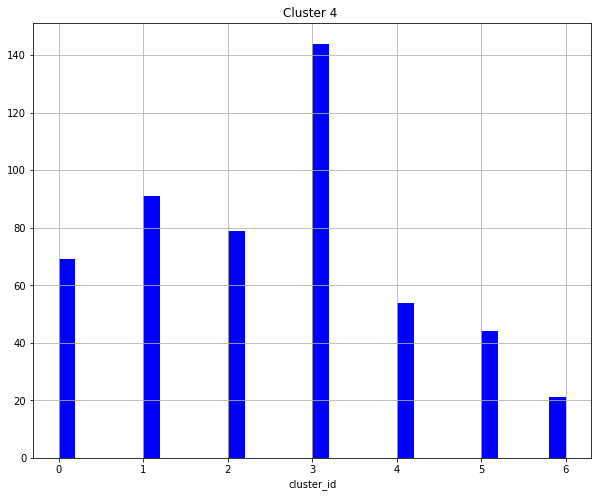

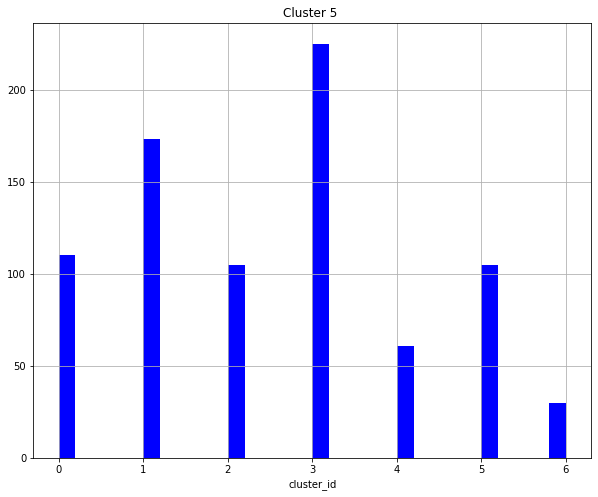

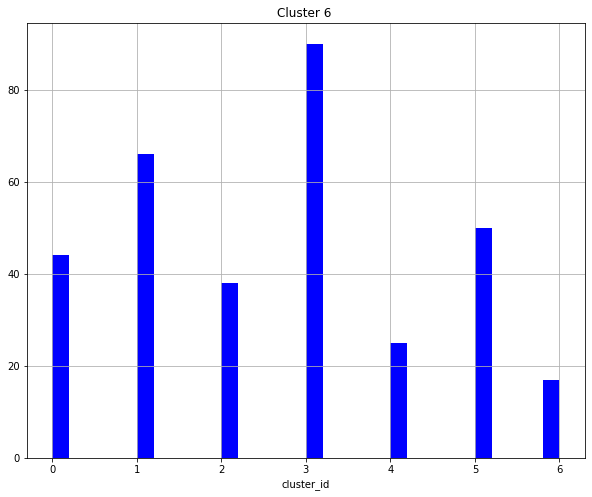

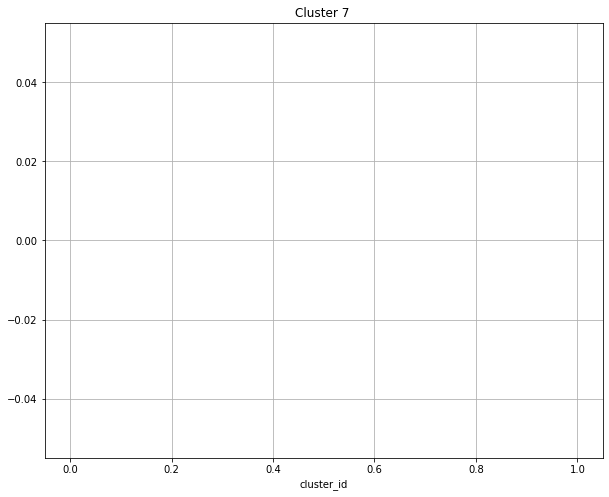

In [23]:
for i  in (df.columns) :
    for j in range(8):
        cluster = df_cluster[df_cluster['Cluster number'] == j]
        cluster[i].hist(bins = 30,figsize=(10,8),color='b')
        
        plt.title('Cluster {} '.format(j))
        plt.xlabel(i)
        plt.show()

# PCA:

In [24]:
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(data=pca_comp,columns=['PCA1','PCA2'])
df_pca

,PCA1,PCA2
0,-1.325627,-2.046647
1,-2.781076,3.311233
2,1.237427,0.544743
3,-0.606668,-0.007158
4,-1.448067,-1.469084
...,...,...
7429,-0.978996,-1.327730
7430,-0.191679,-2.221413
7431,-2.574734,-1.140578
7432,-0.116639,-1.954582


In [25]:
df_new=pd.concat([df_pca,pd.DataFrame({'Cluster number':kmeans.labels_})],axis=1)
df_new

,PCA1,PCA2,Cluster number
0,-1.325627,-2.046647,3
1,-2.781076,3.311233,2
2,1.237427,0.544743,0
3,-0.606668,-0.007158,3
4,-1.448067,-1.469084,3
...,...,...,...
7429,-0.978996,-1.327730,6
7430,-0.191679,-2.221413,6
7431,-2.574734,-1.140578,6
7432,-0.116639,-1.954582,6


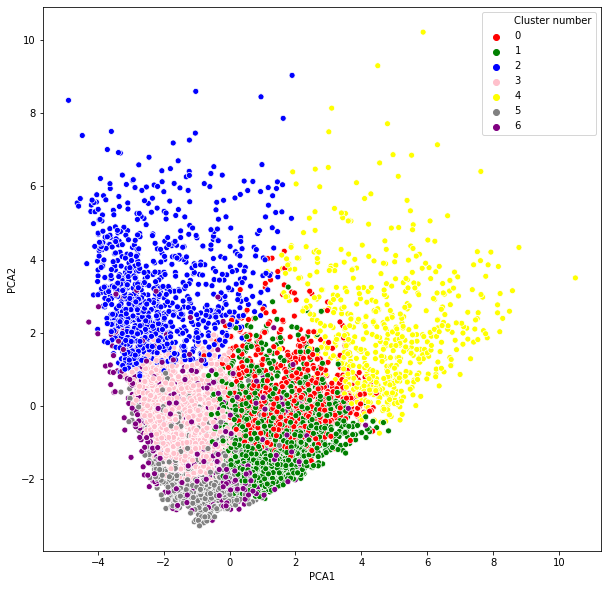

In [26]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue = "Cluster number", data = df_new, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

# Agglomerative Clustering:

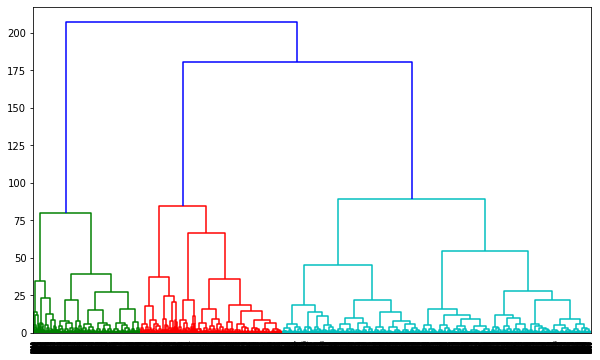

In [27]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(10, 6)) 
Dendrogram = shc.dendrogram((shc.linkage(df_pca, method ='ward'))) 
#visualizing dendogram

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

sil_score=[]
for i in range(2,10):
    sil_score.append(silhouette_score(df_pca, AgglomerativeClustering(n_clusters = i).fit_predict(df_pca))) 
sil_score  


[0.3971925194042492,
 0.4024485650410281,
 0.3053784649362217,
 0.3187733032348884,
 0.33078547251576595,
 0.32947033778562074,
 0.3050647359315782,
 0.3078289489650232]

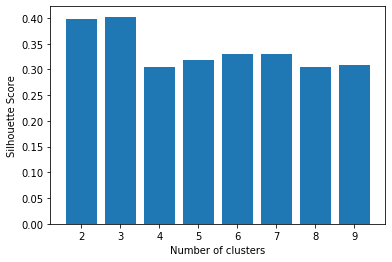

In [29]:
# Plotting a bar graph to compare the results  
plt.bar(range(2,10), sil_score) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 


In [30]:
agg_clust= AgglomerativeClustering(n_clusters=3)
agg_clust.fit_predict(df_pca)
agg_clust

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

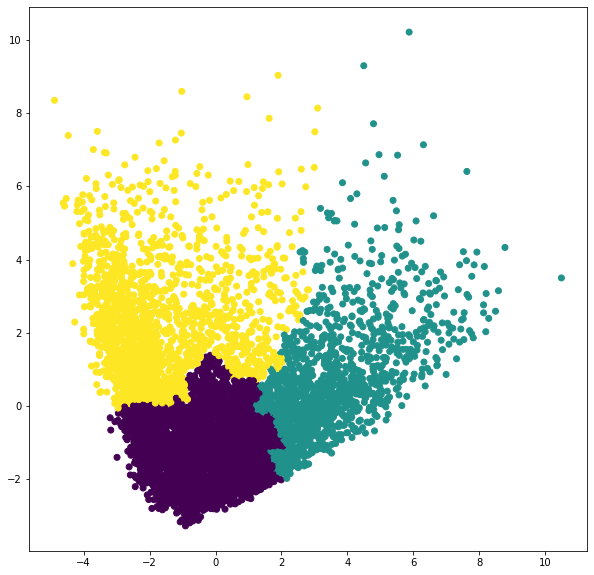

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca['PCA1'],df_pca['PCA2'],c=AgglomerativeClustering(n_clusters=3).fit_predict(df_pca))
plt.show()

# Autoencoders:

In [32]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

Using TensorFlow backend.


In [33]:
input_df = Input(shape=(17,))
x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)
#encoded layer
encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
#decoded layer
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)
# adam optimizer
autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')
#train the autoencoder: we feed in the input and output as the same df_scaled
autoencoder.fit(df_scaled,df_scaled,batch_size= 128, epochs = 25,  verbose = 1)

Train on 7434 samples
Epoch 1/25
7434/7434 [==============================] - 3s 466us/sample - loss: 0.5213
Epoch 2/25
7434/7434 [==============================] - 2s 311us/sample - loss: 0.3027
Epoch 3/25
7434/7434 [==============================] - 2s 286us/sample - loss: 0.2551s - loss: 0.2
Epoch 4/25
7434/7434 [==============================] - 2s 243us/sample - loss: 0.2275
Epoch 5/25
7434/7434 [==============================] - 2s 257us/sample - loss: 0.1969
Epoch 6/25
7434/7434 [==============================] - 2s 267us/sample - loss: 0.1758
Epoch 7/25
7434/7434 [==============================] - 2s 266us/sample - loss: 0.1621
Epoch 8/25
7434/7434 [==============================] - 2s 284us/sample - loss: 0.1513
Epoch 9/25
7434/7434 [==============================] - 2s 289us/sample - loss: 0.1444
Epoch 10/25
7434/7434 [==============================] - 2s 308us/sample - loss: 0.1340
Epoch 11/25
7434/7434 [==============================] - 2s 289us/sample - loss: 0.1319
Epoch 

In [34]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

In [35]:
pred = encoder.predict(df_scaled)
pred.shape
# i went from 17 features to 10 features

(7434, 10)

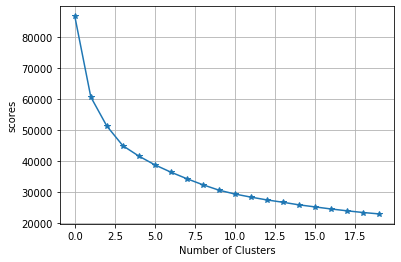

In [36]:
scores = []
for i in range(1,21):
    kmeans = KMeans(n_clusters= i).fit(pred)
    scores.append(kmeans.inertia_)

plt.plot(scores,marker='*')
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('scores') 
plt.show()

In [37]:
kmeans= KMeans(n_clusters=4,random_state=0).fit(pred)

In [38]:
new_df_cluster=pd.concat([df,pd.DataFrame({'Cluster number':kmeans.labels_})],axis=1)
new_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id,Cluster number
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,3.0,0.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2.0,3.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.0,2.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,3.0,3.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125000,3.0,7.0,500.0,98.225317,113.944625,0.000000,8.0,6.0,NaN
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0.0,7.0,1000.0,62.619008,109.580539,0.000000,8.0,6.0,NaN
8878,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125000,3.0,0.0,1200.0,150.755024,337.986933,0.000000,8.0,6.0,NaN
8879,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000000,0.0,6.0,1000.0,169.249683,124.639905,0.000000,8.0,6.0,NaN


In [39]:
pca = PCA(n_components=2)
new_pca_comp = pca.fit_transform(pred)
new_df_pca=pd.DataFrame(data=new_pca_comp,columns=['PCA1','PCA2'])
pca_auto=pd.concat([new_df_pca,pd.DataFrame({'Cluster number':kmeans.labels_})],axis=1)
pca_auto

,PCA1,PCA2,Cluster number
0,-2.143235,-0.171772,0
1,3.520443,-2.703846,3
2,-0.222654,-0.384993,2
3,0.955366,-0.879615,3
4,-2.373225,-0.435291,0
...,...,...,...
7429,5.458726,1.973893,1
7430,5.026786,2.991480,1
7431,6.462922,1.151386,1
7432,5.294155,2.991528,1


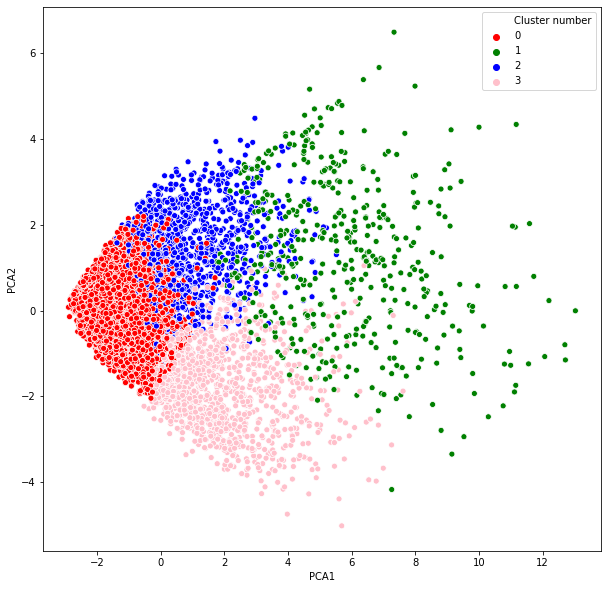

In [41]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue = "Cluster number", data = pca_auto, palette =['red','green','blue','pink'])
plt.show()